In [84]:
import pandas as pd
import numpy as np
import sklearn
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

%matplotlib inline

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('./data/2017_flights.csv', low_memory=False)
df.head()

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription
0,AAL,02/01/2017 09:00,SBBR,02/01/2017 09:00,02/01/2017 01:20,KMIA,02/01/2017 01:20,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
1,AAL,24/01/2017 09:00,SBBR,24/01/2017 09:00,24/01/2017 01:20,KMIA,24/01/2017 01:20,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
2,AAL,29/01/2017 09:00,SBBR,29/01/2017 09:00,29/01/2017 01:20,KMIA,29/01/2017 01:20,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
3,AAL,23/01/2017 09:00,SBBR,23/01/2017 09:00,23/01/2017 01:20,KMIA,23/01/2017 01:20,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
4,AAL,25/01/2017 09:00,SBBR,25/01/2017 09:00,25/01/2017 01:20,KMIA,25/01/2017 01:20,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN


#### Let's convert the date columns to datetime
---

In [4]:
df2 = df.copy()
df2['ArrivalActual'] = pd.to_datetime(df2['ArrivalActual'], format='%d/%m/%Y %H:%M', errors='coerce')
df2['ArrivalScheduled'] = pd.to_datetime(df2['ArrivalScheduled'], format='%d/%m/%Y %H:%M', errors='coerce')
df2['DepartureActual'] = pd.to_datetime(df2['DepartureActual'], format='%d/%m/%Y %H:%M', errors='coerce')
df2['DepartureScheduled'] = pd.to_datetime(df2['DepartureScheduled'], format='%d/%m/%Y %H:%M', errors='coerce')

In [5]:
df2.head()

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription
0,AAL,2017-01-02 09:00:00,SBBR,2017-01-02 09:00:00,2017-01-02 01:20:00,KMIA,2017-01-02 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
1,AAL,2017-01-24 09:00:00,SBBR,2017-01-24 09:00:00,2017-01-24 01:20:00,KMIA,2017-01-24 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
2,AAL,2017-01-29 09:00:00,SBBR,2017-01-29 09:00:00,2017-01-29 01:20:00,KMIA,2017-01-29 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
3,AAL,2017-01-23 09:00:00,SBBR,2017-01-23 09:00:00,2017-01-23 01:20:00,KMIA,2017-01-23 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
4,AAL,2017-01-25 09:00:00,SBBR,2017-01-25 09:00:00,2017-01-25 01:20:00,KMIA,2017-01-25 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN


In [6]:
df2.shape

(1105484, 27)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105484 entries, 0 to 1105483
Data columns (total 27 columns):
Airline                    1105484 non-null object
ArrivalActual              911441 non-null datetime64[ns]
ArrivalAirport             1105484 non-null object
ArrivalScheduled           958138 non-null datetime64[ns]
DepartureActual            911442 non-null datetime64[ns]
DepartureAirport           1105484 non-null object
DepartureScheduled         958138 non-null datetime64[ns]
FlightNo                   1105484 non-null int64
FlightStatus               1105484 non-null object
IDCode                     1105484 non-null object
RouteCode                  1105484 non-null object
StatusReason               418433 non-null object
DepartureAirportName       1105484 non-null object
DepartureCity              1104643 non-null object
DepartureState             973602 non-null object
DepartureCountry           1105484 non-null object
DepartureContinent         1105484 non-null ob

In [8]:
# Check dates
print("Earliest flight arrival:", df2.ArrivalActual.min())
print("Latest flight arrival:", df2.ArrivalActual.max())
print()
print("Earliest flight departure:", df2.DepartureActual.min())
print("Latest flight departure:", df2.DepartureActual.max())

Earliest flight arrival: 2017-01-01 00:08:00
Latest flight arrival: 2018-01-03 05:13:00

Earliest flight departure: 2016-12-31 17:51:00
Latest flight departure: 2018-01-02 20:45:00


In [9]:
print("Earliest scheduled arrival:", df2.ArrivalScheduled.min())
print("Latest scheduled arrival:", df2.ArrivalScheduled.max())
print()
print("Earliest scheduled departure:", df2.DepartureScheduled.min())
print("Latest scheduled departure:", df2.DepartureScheduled.max())

Earliest scheduled arrival: 2017-01-01 01:00:00
Latest scheduled arrival: 2018-01-02 11:00:00

Earliest scheduled departure: 2017-01-01 00:00:00
Latest scheduled departure: 2018-01-02 10:30:00


In [10]:
df2['FlightTime'] = df2.ArrivalActual - df2.DepartureActual
df2.head()

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
0,AAL,2017-01-02 09:00:00,SBBR,2017-01-02 09:00:00,2017-01-02 01:20:00,KMIA,2017-01-02 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN,07:40:00
1,AAL,2017-01-24 09:00:00,SBBR,2017-01-24 09:00:00,2017-01-24 01:20:00,KMIA,2017-01-24 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN,07:40:00
2,AAL,2017-01-29 09:00:00,SBBR,2017-01-29 09:00:00,2017-01-29 01:20:00,KMIA,2017-01-29 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN,07:40:00
3,AAL,2017-01-23 09:00:00,SBBR,2017-01-23 09:00:00,2017-01-23 01:20:00,KMIA,2017-01-23 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN,07:40:00
4,AAL,2017-01-25 09:00:00,SBBR,2017-01-25 09:00:00,2017-01-25 01:20:00,KMIA,2017-01-25 01:20:00,213,REALIZADO,0,I,NaN,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN,07:40:00


In [11]:
# Pct of rows with Nulls
df2.isnull().sum() / df2.shape[0] * 100.0

Airline                     0.000000
ArrivalActual              17.552764
ArrivalAirport              0.000000
ArrivalScheduled           13.328642
DepartureActual            17.552674
DepartureAirport            0.000000
DepartureScheduled         13.328642
FlightNo                    0.000000
FlightStatus                0.000000
IDCode                      0.000000
RouteCode                   0.000000
StatusReason               62.149339
DepartureAirportName        0.000000
DepartureCity               0.076075
DepartureState             11.929797
DepartureCountry            0.000000
DepartureContinent          0.000000
ArrivalAirportName          0.000000
ArrivalCity                 0.067029
ArrivalState               11.979278
ArrivalCountry              0.000000
ArrivalContinent            0.000000
AirlineName                 0.000000
AirlineOrigin               0.014654
FlightType                  0.000000
RouteType                   0.000000
StatusReasonDescription    62.150877
F

In [12]:
df3 = df2.copy()
df3.isnull().sum() / df3.shape[0] * 100.0

Airline                     0.000000
ArrivalActual              17.552764
ArrivalAirport              0.000000
ArrivalScheduled           13.328642
DepartureActual            17.552674
DepartureAirport            0.000000
DepartureScheduled         13.328642
FlightNo                    0.000000
FlightStatus                0.000000
IDCode                      0.000000
RouteCode                   0.000000
StatusReason               62.149339
DepartureAirportName        0.000000
DepartureCity               0.076075
DepartureState             11.929797
DepartureCountry            0.000000
DepartureContinent          0.000000
ArrivalAirportName          0.000000
ArrivalCity                 0.067029
ArrivalState               11.979278
ArrivalCountry              0.000000
ArrivalContinent            0.000000
AirlineName                 0.000000
AirlineOrigin               0.014654
FlightType                  0.000000
RouteType                   0.000000
StatusReasonDescription    62.150877
F

In [13]:
df3.FlightTime.describe()

count                    911441
mean     0 days 02:42:37.776312
std      0 days 03:56:46.696601
min             0 days 00:00:00
25%             0 days 01:10:00
50%             0 days 01:40:00
75%             0 days 02:50:00
max            31 days 11:48:00
Name: FlightTime, dtype: object

### Some flights have no duration while others are 31 days long. Let's dig into these flights some more
---

In [14]:
df3.FlightStatus.value_counts()

REALIZADO    992040
CANCELADO    113444
Name: FlightStatus, dtype: int64

In [15]:
# Let's delete any flights which were not cancelled but have a flight time less than 10 minutes
df3 = df3[(df3.FlightTime > datetime.timedelta(minutes=10))&(df3.FlightStatus == 'REALIZADO')]
df3.sort_values(['FlightTime'], ascending=True).head(10)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
1084145,AZU,2017-12-06 17:53:00,SBRF,NaT,2017-12-06 17:42:00,SBRF,NaT,6927,REALIZADO,3,N,VR,GUARARAPES - GILBERTO FREYRE,RECIFE,PE,BRASIL,AMERICA DO SUL,GUARARAPES - GILBERTO FREYRE,RECIFE,PE,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo de retorno,Nacional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00
1083570,AZU,2017-11-08 08:47:00,SBCF,NaT,2017-11-08 08:36:00,SBCF,NaT,2760,REALIZADO,3,N,VR,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo de retorno,Nacional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00
748416,AZU,2017-10-22 15:18:00,SBRF,2017-10-22 15:20:00,2017-10-22 15:07:00,SBFN,2017-10-22 14:15:00,2939,REALIZADO,0,R,AT,FERNANDO DE NORONHA,FERNANDO DE NORONHA,PE,BRASIL,AMERICA DO SUL,GUARARAPES - GILBERTO FREYRE,RECIFE,PE,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Regional,LIBERAÇÃO SERV. TRAFEGO AÉREO/ANTECIPAÇÃO,00:11:00
1083325,AZU,2017-11-08 08:47:00,SBMK,2017-11-08 09:35:00,2017-11-08 08:36:00,SBCF,2017-11-08 08:40:00,2760,REALIZADO,0,N,VR,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,MÁRIO RIBEIRO,MONTES CLAROS,MG,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00
1084912,AZU,2017-12-03 09:18:00,SBPA,2017-12-03 10:25:00,2017-12-03 09:07:00,SBFI,2017-12-03 09:10:00,6998,REALIZADO,0,R,VR,CATARATAS,FOZ DO IGUAÇU,PR,BRASIL,AMERICA DO SUL,SALGADO FILHO,PORTO ALEGRE,RS,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Regional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00
1084913,AZU,2017-10-07 10:13:00,SBPA,2017-10-07 11:17:00,2017-10-07 10:02:00,SBNF,2017-10-07 10:10:00,2424,REALIZADO,0,R,VR,MINISTRO VICTOR KONDER,NAVEGANTES,SC,BRASIL,AMERICA DO SUL,SALGADO FILHO,PORTO ALEGRE,RS,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Regional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00
1083473,AZU,2017-04-19 06:54:00,SBCF,NaT,2017-04-19 06:43:00,SBCF,NaT,2849,REALIZADO,3,N,VR,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo de retorno,Nacional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00
1084543,AZU,2017-06-11 18:55:00,SBUL,NaT,2017-06-11 18:44:00,SBUL,NaT,2529,REALIZADO,3,N,VR,TENENTE-CORONEL AVIADOR CÉSAR BOMBONATO,UBERLÂNDIA,MG,BRASIL,AMERICA DO SUL,TENENTE-CORONEL AVIADOR CÉSAR BOMBONATO,UBERLÂNDIA,MG,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo de retorno,Nacional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00
1084004,AZU,2017-08-22 11:34:00,SBPA,NaT,2017-08-22 11:23:00,SBPA,NaT,4429,REALIZADO,3,N,VR,SALGADO FILHO,PORTO ALEGRE,RS,BRASIL,AMERICA DO SUL,SALGADO FILHO,PORTO ALEGRE,RS,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo de retorno,Nacional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00
1083949,AZU,2017-12-03 08:56:00,SBCT,NaT,2017-12-03 08:45:00,SBCT,NaT,2484,REALIZADO,3,N,VR,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo de retorno,Nacional,VÔO ESPECIAL DE RETORNO (EXCLUSIVO PARA RETORN...,00:11:00


In [16]:
# What's going on with the longest flights?
df3.sort_values(['FlightTime'], ascending=False).head(20)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
663079,LCO,2017-04-25 01:38:00,SBKP,NaT,2017-03-24 13:50:00,EHAM,NaT,1503,REALIZADO,4,G,NaN,AMSTERDAM AIRPORT SCHIPHOL,AMSTERDAM,NaN,HOLANDA,EUROPA,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,LAN CARGO S.A,ESTRANGEIRA,Inclusão de etapa em um vôo previsto em HOTRAN,Cargueiro internacional,NaN,31 days 11:48:00
139718,ETH,2017-02-09 19:23:00,SBGR,NaT,2017-01-09 11:32:00,DXXX,NaT,506,REALIZADO,1,I,NaN,LOME-TOKOIN AIRPORT,LOME,NaN,TOGO,AFRICA,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,ETHIOPIAN AIR LINES,ESTRANGEIRA,Vôo extra com HOTRAN,Internacional,NaN,31 days 07:51:00
721823,UAE,2017-08-04 15:35:00,SEQM,2017-08-04 12:50:00,2017-07-04 09:51:00,SBKP,2017-08-04 06:50:00,9914,REALIZADO,0,G,MX,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,MARISCAL SUCRE INTERNATIONAL AIRPORT,TABABELA,NaN,EQUADOR,AMERICA DO SUL,EMIRATES,ESTRANGEIRA,Vôo Regular,Cargueiro internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,31 days 05:44:00
704267,CMP,2017-08-05 07:57:00,SAEZ,2017-08-06 07:10:00,2017-07-05 03:28:00,MPTO,2017-08-05 23:55:00,454,REALIZADO,0,I,MX,TOCUMEN INTL,PANAMA,NaN,PANAMA,AMERICA CENTRAL,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,COPA -COMPANIA PANAMENA DE AVIACION,ESTRANGEIRA,Vôo Regular,Internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,31 days 04:29:00
773771,UPS,2017-11-08 04:27:00,SCEL,2017-11-08 02:26:00,2017-10-08 00:27:00,SBKP,2017-11-07 22:30:00,414,REALIZADO,0,G,RA,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,COMODORO ARTURO MERINO BENÃTEZ INTERNATIONAL ...,SANTIAGO DO CHILE,NaN,CHILE,AMERICA DO SUL,UNITED PARCEL SERVICE,ESTRANGEIRA,Vôo Regular,Cargueiro internacional,CONEXÃO DE AERONAVE,31 days 04:00:00
752266,TPA,2017-06-06 23:12:00,KMIA,2017-06-07 05:30:00,2017-05-06 19:23:00,SKBO,2017-06-07 02:00:00,851,REALIZADO,0,G,AT,EL DORADO INTERNATIONAL AIRPORT,BOGOTA,NaN,COLOMBIA,AMERICA DO SUL,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,TAMPA S/A,ESTRANGEIRA,Vôo Regular,Cargueiro internacional,LIBERAÇÃO SERV. TRAFEGO AÉREO/ANTECIPAÇÃO,31 days 03:49:00
752265,TPA,2017-06-21 02:08:00,KMIA,2017-06-21 05:30:00,2017-05-20 22:25:00,SKBO,2017-06-21 02:00:00,851,REALIZADO,0,G,AT,EL DORADO INTERNATIONAL AIRPORT,BOGOTA,NaN,COLOMBIA,AMERICA DO SUL,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,TAMPA S/A,ESTRANGEIRA,Vôo Regular,Cargueiro internacional,LIBERAÇÃO SERV. TRAFEGO AÉREO/ANTECIPAÇÃO,31 days 03:43:00
752286,TPA,2017-11-07 03:21:00,KMIA,2017-11-07 05:30:00,2017-10-06 23:41:00,SKBO,2017-11-07 02:00:00,851,REALIZADO,0,G,AT,EL DORADO INTERNATIONAL AIRPORT,BOGOTA,NaN,COLOMBIA,AMERICA DO SUL,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,TAMPA S/A,ESTRANGEIRA,Vôo Regular,Cargueiro internacional,LIBERAÇÃO SERV. TRAFEGO AÉREO/ANTECIPAÇÃO,31 days 03:40:00
664216,TPA,2017-06-28 03:16:00,KMIA,NaT,2017-05-27 23:42:00,SKRG,NaT,851,REALIZADO,4,G,NaN,JOSÃ‰ MARÃA CÃ“RDOVA INTERNATIONAL AIRPORT,RIO NEGRO/JOSE MARIA CORDOV,NaN,COLOMBIA,AMERICA DO SUL,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,TAMPA S/A,ESTRANGEIRA,Inclusão de etapa em um vôo previsto em HOTRAN,Cargueiro internacional,NaN,31 days 03:34:00
664218,TPA,2017-06-14 03:19:00,KMIA,NaT,2017-05-13 23:59:00,SKRG,NaT,851,REALIZADO,4,G,NaN,JOSÃ‰ MARÃA CÃ“RDOVA INTERNATIONAL AIRPORT,RIO NEGRO/JOSE MARIA CORDOV,NaN,COLOMBIA,AMERICA DO SUL,MIAMI INTERNATIONAL AIRPORT,MIAMI,NaN,ESTADOS UNIDOS DA AMERICA,AMERICA DO NORTE,TAMPA S/A,ESTRANGEIRA,Inclusão de etapa em um vôo previsto em HOTRAN,Ca

### Cargo Flights appear to the longest. What if we exclude these?
---

In [17]:
df4 = df3.copy()
df4 = df4[df4.RouteType != 'Cargueiro internacional']
df4.sort_values(['FlightTime'], ascending=False).head()

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
139718,ETH,2017-02-09 19:23:00,SBGR,NaT,2017-01-09 11:32:00,DXXX,NaT,506,REALIZADO,1,I,NaN,LOME-TOKOIN AIRPORT,LOME,NaN,TOGO,AFRICA,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,ETHIOPIAN AIR LINES,ESTRANGEIRA,Vôo extra com HOTRAN,Internacional,NaN,31 days 07:51:00
704267,CMP,2017-08-05 07:57:00,SAEZ,2017-08-06 07:10:00,2017-07-05 03:28:00,MPTO,2017-08-05 23:55:00,454,REALIZADO,0,I,MX,TOCUMEN INTL,PANAMA,NaN,PANAMA,AMERICA CENTRAL,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,COPA -COMPANIA PANAMENA DE AVIACION,ESTRANGEIRA,Vôo Regular,Internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,31 days 04:29:00
707265,UAE,2017-02-24 00:16:00,SBGL,2017-02-24 00:20:00,2017-01-23 21:30:00,SAEZ,2017-02-23 21:30:00,248,REALIZADO,0,I,MX,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,EMIRATES,ESTRANGEIRA,Vôo Regular,Internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,31 days 02:46:00
706377,AUT,2017-12-13 23:28:00,SBGL,2017-12-13 18:00:00,2017-12-10 19:27:00,SABE,2017-12-13 13:55:00,2250,REALIZADO,0,I,MX,JORGE NEWBERY AIRPORT,BUENOS AIRES/AEROPARQUE,NaN,ARGENTINA,AMERICA DO SUL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,AUSTRAL LÖNEAS AREAS CIELOS DEL SUR S.A,NÃO INFORMADO,Vôo Regular,Internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,3 days 04:01:00
710493,KLM,2017-07-22 19:55:00,EHAM,2017-07-22 10:25:00,2017-07-21 00:40:00,SPJC,2017-07-21 22:00:00,744,REALIZADO,0,I,MX,JORGE CHÃVEZ INTERNATIONAL AIRPORT,LIMA,NaN,PERU,AMERICA DO SUL,AMSTERDAM AIRPORT SCHIPHOL,AMSTERDAM,NaN,HOLANDA,EUROPA,KLM ROYAL DUTCH AIRLINES,ESTRANGEIRA,Vôo Regular,Internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,1 days 19:15:00


### Going to delete these outlier flights that lasted over 3 days
---
   1. ETH506
   2. CMP454
   3. UAE248
   4. AUT2250

In [18]:
df3[(df3.Airline=='ETH')&(df3.FlightNo==506)&(df3.DepartureActual=='2017-01-09 11:32:00')]

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
139718,ETH,2017-02-09 19:23:00,SBGR,NaT,2017-01-09 11:32:00,DXXX,NaT,506,REALIZADO,1,I,NaN,LOME-TOKOIN AIRPORT,LOME,NaN,TOGO,AFRICA,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,ETHIOPIAN AIR LINES,ESTRANGEIRA,Vôo extra com HOTRAN,Internacional,NaN,31 days 07:51:00


In [19]:
df3[(df3.Airline=='CMP')&(df3.FlightNo==454)&(df3.DepartureActual=='2017-07-05 03:28:00')]

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
704267,CMP,2017-08-05 07:57:00,SAEZ,2017-08-06 07:10:00,2017-07-05 03:28:00,MPTO,2017-08-05 23:55:00,454,REALIZADO,0,I,MX,TOCUMEN INTL,PANAMA,NaN,PANAMA,AMERICA CENTRAL,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,COPA -COMPANIA PANAMENA DE AVIACION,ESTRANGEIRA,Vôo Regular,Internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,31 days 04:29:00


In [20]:
df3[(df3.Airline=='UAE')&(df3.FlightNo==248)&(df3.DepartureActual=='2017-01-23 21:30:00')]

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
707265,UAE,2017-02-24 00:16:00,SBGL,2017-02-24 00:20:00,2017-01-23 21:30:00,SAEZ,2017-02-23 21:30:00,248,REALIZADO,0,I,MX,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,EMIRATES,ESTRANGEIRA,Vôo Regular,Internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,31 days 02:46:00


In [21]:
df3[(df3.Airline=='AUT')&(df3.FlightNo==2250)&(df3.DepartureActual=='2017-12-10 19:27:00')]

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
706377,AUT,2017-12-13 23:28:00,SBGL,2017-12-13 18:00:00,2017-12-10 19:27:00,SABE,2017-12-13 13:55:00,2250,REALIZADO,0,I,MX,JORGE NEWBERY AIRPORT,BUENOS AIRES/AEROPARQUE,NaN,ARGENTINA,AMERICA DO SUL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,AUSTRAL LÖNEAS AREAS CIELOS DEL SUR S.A,NÃO INFORMADO,Vôo Regular,Internacional,ATRASOS NÃO ESPECÍFICOS ¿ OUTROS,3 days 04:01:00


In [22]:
df5 = df3.copy()
df5.drop([139718,704267,707265,706377], axis=0, inplace=True)

### Q1a. What are the busiest airports in Brazil?
---
Define busiest by total number of flights arriving and departing over the year.

In [23]:
df5.RouteType.value_counts()

Nacional                   481196
Regional                   203444
Internacional              151484
Especial                    37139
Cargueiro                   17188
Cargueiro internacional     14547
Rede Postal                  5502
Sub-Regional                  449
Unknown                       123
Name: RouteType, dtype: int64

In [24]:
# Filter out any flights not arriving/departing out of brazil
brasil = df5.loc[(df3.ArrivalCountry == 'BRASIL') | (df5.DepartureCountry == 'BRASIL')]
brasil.sample(5)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
459287,TAM,2017-11-01 23:20:00,SBGR,2017-11-01 23:20:00,2017-11-01 21:35:00,SBBR,2017-11-01 21:35:00,4601,REALIZADO,0,R,NaN,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Regional,NaN,01:45:00
227882,TAM,2017-08-29 11:46:00,SBFI,2017-08-29 11:46:00,2017-08-29 09:35:00,SBGL,2017-08-29 09:35:00,3188,REALIZADO,0,N,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,CATARATAS,FOZ DO IGUAÇU,PR,BRASIL,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Nacional,NaN,02:11:00
618670,PAM,2017-11-20 22:27:00,SBEG,2017-11-20 22:27:00,2017-11-20 21:27:00,SWPI,2017-11-20 21:27:00,5965,REALIZADO,0,R,NaN,JÚLIO BÉLEM,PARINTINS,AM,BRASIL,AMERICA DO SUL,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,MAP LINHAS AEREAS,BRASILEIRA,Vôo Regular,Regional,NaN,01:00:00
266118,GLO,2017-04-07 08:50:00,SBBR,2017-04-07 08:50:00,2017-04-07 07:00:00,SBCT,2017-04-07 07:00:00,1755,REALIZADO,0,N,NaN,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:50:00
829909,AZU,2017-06-27 14:55:00,SBCF,2017-06-27 14:40:00,2017-06-27 13:58:00,SBVT,2017-06-27 13:35:00,4229,REALIZADO,0,N,RM,EURICO DE AGUIAR SALLES,VITÓRIA,ES,BRASIL,AMERICA DO SUL,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,CONEXÃO AERONAVE/VOLTA ¿ VÔO DE IDA NÃO PENALI...,00:57:00


In [25]:
brasil.FlightStatus.value_counts()

REALIZADO    865436
Name: FlightStatus, dtype: int64

In [26]:
# Order by arrival date
brasil = brasil.sort_values(['ArrivalActual']).reset_index(drop=True)
brasil.head(10)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
0,AVA,2017-01-01 00:08:00,SBGR,2017-01-02 00:10:00,2016-12-31 17:51:00,SKBO,2017-01-01 18:00:00,249,REALIZADO,0,I,NaN,EL DORADO INTERNATIONAL AIRPORT,BOGOTA,NaN,COLOMBIA,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,AVIANCA,ESTRANGEIRA,Vôo Regular,Internacional,NaN,06:17:00
1,GLO,2017-01-01 01:10:00,SBBE,2017-01-01 01:10:00,2017-01-01 00:05:00,SBSL,2017-01-01 00:05:00,1892,REALIZADO,0,N,NaN,MARECHAL CUNHA MACHADO,SÃO LUÍS,MA,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:05:00
2,AZU,2017-01-01 02:12:00,SBKP,NaT,2017-01-01 00:48:00,SBBH,NaT,1,REALIZADO,2,N,NaN,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,BELO HORIZONTE,MG,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo extra sem HOTRAN,Nacional,NaN,01:24:00
3,ARG,2017-01-01 02:20:00,SABE,2017-01-01 02:20:00,2017-01-01 00:25:00,SBGR,2017-01-01 00:25:00,1243,REALIZADO,0,I,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,JORGE NEWBERY AIRPORT,BUENOS AIRES/AEROPARQUE,NaN,ARGENTINA,AMERICA DO SUL,AEROLINEAS ARGENTINAS,ESTRANGEIRA,Vôo Regular,Internacional,NaN,01:55:00
4,GLO,2017-01-01 02:35:00,SBBE,2017-01-01 02:35:00,2017-01-01 00:45:00,SBFZ,2017-01-01 00:45:00,1886,REALIZADO,0,N,NaN,PINTO MARTINS,FORTALEZA,CE,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:50:00
5,GLO,2017-01-01 02:45:00,SBSN,2017-01-01 02:45:00,2017-01-01 01:25:00,SBBE,2017-01-01 01:25:00,1848,REALIZADO,0,N,NaN,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,MAESTRO WILSON FONSECA,SANTARÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:20:00
6,GLO,2017-01-01 02:55:00,SBGR,NaT,2017-01-01 01:10:00,SBPS,NaT,9348,REALIZADO,9,N,NaN,PORTO SEGURO,PORTO SEGURO,BA,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo charter,Nacional,NaN,01:45:00
7,QTR,2017-01-01 03:00:00,SBGR,2017-01-01 03:00:00,2017-01-01 00:20:00,SAEZ,2017-01-01 00:20:00,774,REALIZADO,0,I,NaN,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,QATAR AIRWAYS,ESTRANGEIRA,Vôo Regular,Internacional,NaN,02:40:00
8,AZU,2017-01-01 03:04:00,SBAR,2017-01-02 03:15:00,2017-01-01 02:13:00,SBMO,2017-01-02 02:25:00,4100,REALIZADO,0,N,HD,ZUMBI DOS PALMARES,RIO LARGO,AL,BRASIL,AMERICA DO SUL,SANTA MARIA,ARACAJU,SE,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,00:51:00
9,AZU,2017-01-01 03:26:00,SBEG,2017-01-01 03:35:00,2017-01-01 02:07:00,SBBV,2017-01-01 02:20:00,4171,REALIZADO,0,N,HD,ATLAS BRASIL CANTANHEDE,BOA VISTA,RR,BRASIL,AMERICA DO SUL,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,01:19:00


In [27]:
# Let's drop all flights that were cancelled
brasil = brasil.loc[brasil.FlightStatus != 'CANCELADO']
brasil.head(10)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
0,AVA,2017-01-01 00:08:00,SBGR,2017-01-02 00:10:00,2016-12-31 17:51:00,SKBO,2017-01-01 18:00:00,249,REALIZADO,0,I,NaN,EL DORADO INTERNATIONAL AIRPORT,BOGOTA,NaN,COLOMBIA,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,AVIANCA,ESTRANGEIRA,Vôo Regular,Internacional,NaN,06:17:00
1,GLO,2017-01-01 01:10:00,SBBE,2017-01-01 01:10:00,2017-01-01 00:05:00,SBSL,2017-01-01 00:05:00,1892,REALIZADO,0,N,NaN,MARECHAL CUNHA MACHADO,SÃO LUÍS,MA,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:05:00
2,AZU,2017-01-01 02:12:00,SBKP,NaT,2017-01-01 00:48:00,SBBH,NaT,1,REALIZADO,2,N,NaN,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,BELO HORIZONTE,MG,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo extra sem HOTRAN,Nacional,NaN,01:24:00
3,ARG,2017-01-01 02:20:00,SABE,2017-01-01 02:20:00,2017-01-01 00:25:00,SBGR,2017-01-01 00:25:00,1243,REALIZADO,0,I,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,JORGE NEWBERY AIRPORT,BUENOS AIRES/AEROPARQUE,NaN,ARGENTINA,AMERICA DO SUL,AEROLINEAS ARGENTINAS,ESTRANGEIRA,Vôo Regular,Internacional,NaN,01:55:00
4,GLO,2017-01-01 02:35:00,SBBE,2017-01-01 02:35:00,2017-01-01 00:45:00,SBFZ,2017-01-01 00:45:00,1886,REALIZADO,0,N,NaN,PINTO MARTINS,FORTALEZA,CE,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:50:00
5,GLO,2017-01-01 02:45:00,SBSN,2017-01-01 02:45:00,2017-01-01 01:25:00,SBBE,2017-01-01 01:25:00,1848,REALIZADO,0,N,NaN,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,MAESTRO WILSON FONSECA,SANTARÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:20:00
6,GLO,2017-01-01 02:55:00,SBGR,NaT,2017-01-01 01:10:00,SBPS,NaT,9348,REALIZADO,9,N,NaN,PORTO SEGURO,PORTO SEGURO,BA,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo charter,Nacional,NaN,01:45:00
7,QTR,2017-01-01 03:00:00,SBGR,2017-01-01 03:00:00,2017-01-01 00:20:00,SAEZ,2017-01-01 00:20:00,774,REALIZADO,0,I,NaN,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,QATAR AIRWAYS,ESTRANGEIRA,Vôo Regular,Internacional,NaN,02:40:00
8,AZU,2017-01-01 03:04:00,SBAR,2017-01-02 03:15:00,2017-01-01 02:13:00,SBMO,2017-01-02 02:25:00,4100,REALIZADO,0,N,HD,ZUMBI DOS PALMARES,RIO LARGO,AL,BRASIL,AMERICA DO SUL,SANTA MARIA,ARACAJU,SE,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,00:51:00
9,AZU,2017-01-01 03:26:00,SBEG,2017-01-01 03:35:00,2017-01-01 02:07:00,SBBV,2017-01-01 02:20:00,4171,REALIZADO,0,N,HD,ATLAS BRASIL CANTANHEDE,BOA VISTA,RR,BRASIL,AMERICA DO SUL,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,01:19:00


In [28]:
brasil.shape

(865436, 28)

In [29]:
brasil.FlightStatus.value_counts()

REALIZADO    865436
Name: FlightStatus, dtype: int64

In [30]:
brasil_arrivals = brasil.loc[brasil.ArrivalCountry == 'BRASIL']
brasil_arrivals.sample(10)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
26142,TAM,2017-01-10 17:00:00,SBBR,2017-01-10 17:00:00,2017-01-10 15:02:00,SBMA,2017-01-10 15:02:00,4735,REALIZADO,0,N,NaN,MARABÁ,MARABÁ,PA,BRASIL,AMERICA DO SUL,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Nacional,NaN,01:58:00
28570,AZU,2017-01-11 14:12:00,SBBW,2017-01-11 14:52:00,2017-01-11 13:57:00,SBCY,2017-01-11 13:37:00,4206,REALIZADO,0,N,TD,MARECHAL RONDON,VÁRZEA GRANDE,MT,BRASIL,AMERICA DO SUL,BARRA DO GARÇAS,BARRA DO GARÇAS,MT,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,DEFEITOS DA AERONAVE,00:15:00
532714,GLO,2017-07-27 11:00:00,SBGR,2017-07-27 11:00:00,2017-07-27 07:10:00,SCEL,2017-07-27 07:10:00,7661,REALIZADO,0,I,NaN,COMODORO ARTURO MERINO BENÃTEZ INTERNATIONAL ...,SANTIAGO DO CHILE,NaN,CHILE,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Internacional,NaN,03:50:00
270974,TAM,2017-04-14 02:44:00,SBMQ,2017-04-14 02:44:00,2017-04-13 23:55:00,SBBR,2017-04-13 23:55:00,3528,REALIZADO,0,R,NaN,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,MACAPÁ,MACAPÁ,AP,BRASIL,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Regional,NaN,02:49:00
814608,GLO,2017-12-13 13:10:00,SBDN,2017-12-13 13:10:00,2017-12-13 12:00:00,SBSP,2017-12-13 12:00:00,1334,REALIZADO,0,N,NaN,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,PRESIDENTE PRUDENTE,PRESIDENTE PRUDENTE,SP,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:10:00
422576,AZU,2017-06-14 19:35:00,SBKP,NaT,2017-06-14 18:07:00,SBTG,NaT,9124,REALIZADO,2,N,NaN,AEROPORTO REGIONAL PLÍNIO ALARCON,TRÊS LAGOAS,MS,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo extra sem HOTRAN,Nacional,NaN,01:28:00
140800,GLO,2017-02-22 07:05:00,SBFL,2017-02-22 07:05:00,2017-02-22 06:07:00,SBPA,2017-02-22 06:07:00,1920,REALIZADO,0,N,NaN,SALGADO FILHO,PORTO ALEGRE,RS,BRASIL,AMERICA DO SUL,HERCÍLIO LUZ,FLORIANÓPOLIS,SC,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,00:58:00
739011,AFR,2017-11-14 19:05:00,SBGR,2017-11-14 19:05:00,2017-11-14 07:05:00,LFPG,2017-11-14 07:05:00,456,REALIZADO,0,I,NaN,PARIS-CHARLES DE GAULLE AIRPORT (ROISSY AIRPORT),PARIS,NaN,FRANCA,EUROPA,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,AIR FRANCE,ESTRANGEIRA,Vôo Regular,Internacional,NaN,12:00:00
112411,GLO,2017-02-11 07:55:00,SBVT,2017-02-11 07:55:00,2017-02-11 06:25:00,SBSP,2017-02-11 06:25:00,1386,REALIZADO,0,N,NaN,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,EURICO DE AGUIAR SALLES,VITÓRIA,ES,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:30:00
166529,GLO,2017-03-04 12:35:00,SBSP,2017-03-04 12:35:00,2017-03-04 11:10:00,SBCX,2017-03-04 11:10:00,1271,REALIZADO,0,R,NaN,REGIONAL HUGO CANTERGIANI,CAXIAS DO SUL,RS,BRASIL,AMERICA DO SUL,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Regional,NaN,01:25:00


In [31]:
brasil_arrivals.FlightStatus.value_counts()

REALIZADO    805597
Name: FlightStatus, dtype: int64

In [32]:
brasil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865436 entries, 0 to 865435
Data columns (total 28 columns):
Airline                    865436 non-null object
ArrivalActual              865436 non-null datetime64[ns]
ArrivalAirport             865436 non-null object
ArrivalScheduled           810005 non-null datetime64[ns]
DepartureActual            865436 non-null datetime64[ns]
DepartureAirport           865436 non-null object
DepartureScheduled         810005 non-null datetime64[ns]
FlightNo                   865436 non-null int64
FlightStatus               865436 non-null object
IDCode                     865436 non-null object
RouteCode                  865436 non-null object
StatusReason               275148 non-null object
DepartureAirportName       865436 non-null object
DepartureCity              865037 non-null object
DepartureState             806360 non-null object
DepartureCountry           865436 non-null object
DepartureContinent         865436 non-null object
ArrivalA

In [33]:
brasil_departures = brasil.loc[brasil.DepartureCountry == 'BRASIL']
brasil_departures.sample(10)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
121368,TAM,2017-02-14 18:25:00,SBBR,2017-02-14 18:25:00,2017-02-14 16:30:00,SBRJ,2017-02-14 16:30:00,3148,REALIZADO,0,N,NaN,SANTOS DUMONT,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Nacional,NaN,01:55:00
692688,AZU,2017-10-27 14:30:00,SBKP,2017-10-27 14:30:00,2017-10-27 13:30:00,SBCT,2017-10-27 13:30:00,4103,REALIZADO,0,N,NaN,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:00:00
843,TAM,2017-01-01 15:07:00,SBGL,2017-01-01 15:25:00,2017-01-01 13:13:00,SBFI,2017-01-01 13:24:00,3186,REALIZADO,0,N,AT,CATARATAS,FOZ DO IGUAÇU,PR,BRASIL,AMERICA DO SUL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Nacional,LIBERAÇÃO SERV. TRAFEGO AÉREO/ANTECIPAÇÃO,01:54:00
241824,ONE,2017-04-02 20:36:00,SBGL,2017-04-02 19:55:00,2017-04-02 19:23:00,SBGR,2017-04-02 18:45:00,6152,REALIZADO,0,N,TC,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,AVIANCA BRASIL,BRASILEIRA,Vôo Regular,Nacional,TROCA DE AERONAVE,01:13:00
152823,TAM,2017-02-26 21:00:00,SBGL,2017-02-26 21:00:00,2017-02-26 19:55:00,SBSP,2017-02-26 19:55:00,3240,REALIZADO,0,N,NaN,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Nacional,NaN,01:05:00
609658,GLO,2017-08-25 23:31:00,SBVT,2017-08-25 23:15:00,2017-08-25 21:50:00,SBGR,2017-08-25 21:45:00,1398,REALIZADO,0,R,AR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,EURICO DE AGUIAR SALLES,VITÓRIA,ES,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Regional,AEROPORTO COM RESTRIÇÕES OPERACIONAIS,01:41:00
626761,GLO,2017-10-01 20:50:00,SBGR,NaT,2017-10-01 17:57:00,SBGR,NaT,1296,REALIZADO,4,N,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Inclusão de etapa em um vôo previsto em HOTRAN,Nacional,NaN,02:53:00
79905,AZU,2017-01-30 07:55:00,SBKP,2017-01-30 07:55:00,2017-01-30 06:40:00,SBCF,2017-01-30 06:40:00,5265,REALIZADO,0,R,NaN,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Regional,NaN,01:15:00
32966,AZU,2017-01-13 02:12:00,SBSL,2017-01-13 02:12:00,2017-01-12 23:25:00,SBCF,2017-01-12 23:25:00,2544,REALIZADO,0,R,NaN,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,MARECHAL CUNHA MACHADO,SÃO LUÍS,MA,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Regional,NaN,02:47:00
463520,TAM,2017-07-01 13:37:00,SBGL,2017-07-01 13:15:00,2017-07-01 10:57:00,SBMO,2017-07-01 10:37:00,3506,REALIZADO,0,N,RA,ZUMBI DOS PALMARES,RIO LARGO,AL,BRASIL,AMERICA DO SUL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Nacional,CONEXÃO DE AERONAVE,02:40:00


In [34]:
brasil_departures.FlightStatus.value_counts()

REALIZADO    805725
Name: FlightStatus, dtype: int64

In [35]:
# TOP 5 Busiest Arrivals
brasil_arrivals.groupby(['ArrivalAirport','ArrivalAirportName'])['FlightNo'].agg(len).sort_values(ascending=False).head()

ArrivalAirport  ArrivalAirportName                                                     
SBGR            GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO                                114758
SBSP            CONGONHAS                                                                   80826
SBBR            PRESIDENTE JUSCELINO KUBITSCHEK                                             57773
SBGL            AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALEÃO – ANTONIO CARLOS JOBIM     52478
SBKP            VIRACOPOS                                                                   49938
Name: FlightNo, dtype: int64

In [36]:
# TOP 5 Busiest Departures
brasil_departures.groupby(['DepartureAirport','DepartureAirportName'])['FlightNo'].agg(len).sort_values(ascending=False).head()

DepartureAirport  DepartureAirportName                                                   
SBGR              GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO                                114845
SBSP              CONGONHAS                                                                   80820
SBBR              PRESIDENTE JUSCELINO KUBITSCHEK                                             57815
SBGL              AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALEÃO – ANTONIO CARLOS JOBIM     52469
SBKP              VIRACOPOS                                                                   50255
Name: FlightNo, dtype: int64

### Q1 b. What are the busiest routes between cities?
---

In [37]:
brasil_routes = brasil.copy()
brasil_routes['Route'] = brasil['DepartureCity'] + ' to ' + brasil['ArrivalCity']
brasil_routes.head()

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime,Route
0,AVA,2017-01-01 00:08:00,SBGR,2017-01-02 00:10:00,2016-12-31 17:51:00,SKBO,2017-01-01 18:00:00,249,REALIZADO,0,I,NaN,EL DORADO INTERNATIONAL AIRPORT,BOGOTA,NaN,COLOMBIA,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,AVIANCA,ESTRANGEIRA,Vôo Regular,Internacional,NaN,06:17:00,BOGOTA to GUARULHOS
1,GLO,2017-01-01 01:10:00,SBBE,2017-01-01 01:10:00,2017-01-01 00:05:00,SBSL,2017-01-01 00:05:00,1892,REALIZADO,0,N,NaN,MARECHAL CUNHA MACHADO,SÃO LUÍS,MA,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:05:00,SÃO LUÍS to BELÉM
2,AZU,2017-01-01 02:12:00,SBKP,NaT,2017-01-01 00:48:00,SBBH,NaT,1,REALIZADO,2,N,NaN,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,BELO HORIZONTE,MG,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo extra sem HOTRAN,Nacional,NaN,01:24:00,BELO HORIZONTE to CAMPINAS
3,ARG,2017-01-01 02:20:00,SABE,2017-01-01 02:20:00,2017-01-01 00:25:00,SBGR,2017-01-01 00:25:00,1243,REALIZADO,0,I,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,JORGE NEWBERY AIRPORT,BUENOS AIRES/AEROPARQUE,NaN,ARGENTINA,AMERICA DO SUL,AEROLINEAS ARGENTINAS,ESTRANGEIRA,Vôo Regular,Internacional,NaN,01:55:00,GUARULHOS to BUENOS AIRES/AEROPARQUE
4,GLO,2017-01-01 02:35:00,SBBE,2017-01-01 02:35:00,2017-01-01 00:45:00,SBFZ,2017-01-01 00:45:00,1886,REALIZADO,0,N,NaN,PINTO MARTINS,FORTALEZA,CE,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:50:00,FORTALEZA to BELÉM


In [38]:
brasil_routes.groupby(['Route'])['FlightNo'].agg(len).sort_values(ascending=False).head()

Route
SÃO PAULO to RIO DE JANEIRO    21117
RIO DE JANEIRO to SÃO PAULO    21027
GUARULHOS to RIO DE JANEIRO     8209
RIO DE JANEIRO to GUARULHOS     8093
SÃO PAULO to BRASÍLIA           7337
Name: FlightNo, dtype: int64

### Q2: Can you estimate how many people have flown in Brazil on a given day in 2017?
---
Average number of flights per day x Average Number of Passengers on a Flight

In [39]:
brasil_days = brasil.copy()
brasil_days['Arrival_dayofweek'] = brasil_days['ArrivalActual'].dt.weekday_name
brasil_days.head(10)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime,Arrival_dayofweek
0,AVA,2017-01-01 00:08:00,SBGR,2017-01-02 00:10:00,2016-12-31 17:51:00,SKBO,2017-01-01 18:00:00,249,REALIZADO,0,I,NaN,EL DORADO INTERNATIONAL AIRPORT,BOGOTA,NaN,COLOMBIA,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,AVIANCA,ESTRANGEIRA,Vôo Regular,Internacional,NaN,06:17:00,Sunday
1,GLO,2017-01-01 01:10:00,SBBE,2017-01-01 01:10:00,2017-01-01 00:05:00,SBSL,2017-01-01 00:05:00,1892,REALIZADO,0,N,NaN,MARECHAL CUNHA MACHADO,SÃO LUÍS,MA,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:05:00,Sunday
2,AZU,2017-01-01 02:12:00,SBKP,NaT,2017-01-01 00:48:00,SBBH,NaT,1,REALIZADO,2,N,NaN,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,BELO HORIZONTE,MG,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo extra sem HOTRAN,Nacional,NaN,01:24:00,Sunday
3,ARG,2017-01-01 02:20:00,SABE,2017-01-01 02:20:00,2017-01-01 00:25:00,SBGR,2017-01-01 00:25:00,1243,REALIZADO,0,I,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,JORGE NEWBERY AIRPORT,BUENOS AIRES/AEROPARQUE,NaN,ARGENTINA,AMERICA DO SUL,AEROLINEAS ARGENTINAS,ESTRANGEIRA,Vôo Regular,Internacional,NaN,01:55:00,Sunday
4,GLO,2017-01-01 02:35:00,SBBE,2017-01-01 02:35:00,2017-01-01 00:45:00,SBFZ,2017-01-01 00:45:00,1886,REALIZADO,0,N,NaN,PINTO MARTINS,FORTALEZA,CE,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:50:00,Sunday
5,GLO,2017-01-01 02:45:00,SBSN,2017-01-01 02:45:00,2017-01-01 01:25:00,SBBE,2017-01-01 01:25:00,1848,REALIZADO,0,N,NaN,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,MAESTRO WILSON FONSECA,SANTARÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:20:00,Sunday
6,GLO,2017-01-01 02:55:00,SBGR,NaT,2017-01-01 01:10:00,SBPS,NaT,9348,REALIZADO,9,N,NaN,PORTO SEGURO,PORTO SEGURO,BA,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo charter,Nacional,NaN,01:45:00,Sunday
7,QTR,2017-01-01 03:00:00,SBGR,2017-01-01 03:00:00,2017-01-01 00:20:00,SAEZ,2017-01-01 00:20:00,774,REALIZADO,0,I,NaN,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,BUENOS AIRES,NaN,ARGENTINA,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,QATAR AIRWAYS,ESTRANGEIRA,Vôo Regular,Internacional,NaN,02:40:00,Sunday
8,AZU,2017-01-01 03:04:00,SBAR,2017-01-02 03:15:00,2017-01-01 02:13:00,SBMO,2017-01-02 02:25:00,4100,REALIZADO,0,N,HD,ZUMBI DOS PALMARES,RIO LARGO,AL,BRASIL,AMERICA DO SUL,SANTA MARIA,ARACAJU,SE,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,00:51:00,Sunday
9,AZU,2017-01-01 03:26:00,SBEG,2017-01-01 03:35:00,2017-01-01 02:07:00,SBBV,2017-01-01 02:20:00,4171,REALIZADO,0,N,HD,ATLAS BRASIL CANTANHEDE,BOA VISTA,RR,BRASIL,AMERICA DO SUL,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,01:19:00,Sunday


In [40]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
brasil_days.groupby(['Arrival_dayofweek'])['FlightNo'].agg(len).reindex(cats)

Arrival_dayofweek
Monday       133045
Tuesday      127144
Wednesday    126359
Thursday     130509
Friday       129071
Saturday     105393
Sunday       113915
Name: FlightNo, dtype: int64

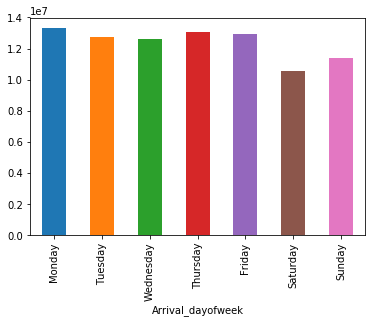

In [41]:
# Group by Day of Week
(brasil_days.groupby(['Arrival_dayofweek'])['FlightNo'].agg(len).reindex(cats)*100).plot.bar()
plt.show()

### Q3. Can you find a way to distinguish between tourist and business destinations in the dataset?
---
Business travellers are less likely to travel to business meetings on weekends. So look at which airports/regions suffer the largest decline in traffic on Saturday and Sunday.

In [42]:
brasil_destinations = brasil_days.copy()
brasil_destinations.sample(10)

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime,Arrival_dayofweek
680061,TPA,2017-10-22 21:27:00,SBKP,2017-10-22 19:30:00,2017-10-22 19:34:00,SBCT,2017-10-22 18:35:00,842,REALIZADO,0,G,NaN,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,TAMPA S/A,ESTRANGEIRA,Vôo Regular,Cargueiro internacional,NaN,01:53:00,Sunday
574382,ONE,2017-08-12 07:21:00,SBGR,2017-08-12 07:30:00,2017-08-12 06:09:00,SBGL,2017-08-12 06:15:00,6255,REALIZADO,0,N,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,AVIANCA BRASIL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:12:00,Saturday
286594,AZU,2017-04-20 16:09:00,SBRF,2017-04-20 16:17:00,2017-04-20 15:30:00,SBKG,2017-04-20 15:37:00,6981,REALIZADO,0,N,HD,PRESIDENTE JOÃO SUASSUNA,CAMPINA GRANDE,PB,BRASIL,AMERICA DO SUL,GUARARAPES - GILBERTO FREYRE,RECIFE,PE,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,00:39:00,Thursday
602698,BOV,2017-08-23 12:10:00,SBGR,2017-08-23 12:10:00,2017-08-23 08:25:00,SLVR,2017-08-23 08:25:00,736,REALIZADO,0,I,NaN,VIRU VIRU INTERNATIONAL AIRPORT,VIRU VIRU,NaN,BOLIVIA,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,BOLIVIANA DE AVIACION,ESTRANGEIRA,Vôo Regular,Internacional,NaN,03:45:00,Wednesday
330736,AZU,2017-05-08 18:04:00,SBKP,2017-05-08 18:30:00,2017-05-08 17:06:00,SBRJ,2017-05-08 17:15:00,5758,REALIZADO,0,N,HD,SANTOS DUMONT,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,00:58:00,Monday
182300,ONE,2017-03-10 14:23:00,SBGR,2017-03-10 14:40:00,2017-03-10 11:01:00,SBFZ,2017-03-10 11:08:00,6373,REALIZADO,0,N,NaN,PINTO MARTINS,FORTALEZA,CE,BRASIL,AMERICA DO SUL,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,AVIANCA BRASIL,BRASILEIRA,Vôo Regular,Nacional,NaN,03:22:00,Friday
446596,GLO,2017-06-24 22:18:00,SBRF,2017-06-24 22:18:00,2017-06-24 19:10:00,SBSP,2017-06-24 19:10:00,1560,REALIZADO,0,N,NaN,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,GUARARAPES - GILBERTO FREYRE,RECIFE,PE,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,03:08:00,Saturday
205072,AZU,2017-03-19 15:39:00,SBNF,2017-03-19 15:55:00,2017-03-19 14:41:00,SBKP,2017-03-19 14:45:00,2875,REALIZADO,0,N,HD,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,MINISTRO VICTOR KONDER,NAVEGANTES,SC,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,00:58:00,Sunday
277603,AZU,2017-04-17 07:20:00,SBCF,2017-04-17 07:20:00,2017-04-17 06:10:00,SBSP,2017-04-17 06:10:00,2938,REALIZADO,0,R,NaN,CONGONHAS,SÃO PAULO,SP,BRASIL,AMERICA DO SUL,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Regional,NaN,01:10:00,Monday
678008,AZU,2017-10-21 22:25:00,SBFL,2017-10-21 22:30:00,2017-10-21 21:14:00,SBKP,2017-10-21 21:15:00,2709,REALIZADO,0,N,HD,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,HERCÍLIO LUZ,FLORIANÓPOLIS,SC,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,01:11:00,Saturday


In [43]:
brasil_weekdays = brasil_destinations.loc[brasil_destinations.ArrivalActual.dt.dayofweek < 5]
brasil_weekends = brasil_destinations.loc[brasil_destinations.ArrivalActual.dt.dayofweek >= 5]
brasil_weekdays.Arrival_dayofweek.value_counts()

Monday       133045
Thursday     130509
Friday       129071
Tuesday      127144
Wednesday    126359
Name: Arrival_dayofweek, dtype: int64

In [44]:
brasil_weekends.Arrival_dayofweek.value_counts()

Sunday      113915
Saturday    105393
Name: Arrival_dayofweek, dtype: int64

In [45]:
brasil_weekdays.head()

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime,Arrival_dayofweek
2092,GLO,2017-01-02 00:00:00,SBSV,2017-01-02 00:00:00,2017-01-01 21:40:00,SBGR,2017-01-01 21:40:00,1698,REALIZADO,0,N,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,DEPUTADO LUÍS EDUARDO MAGALHÃES,SALVADOR,BA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,02:20:00,Monday
2093,TAM,2017-01-02 00:00:00,SCEL,2017-01-02 00:00:00,2017-01-01 19:20:00,SBGL,2017-01-01 19:20:00,8138,REALIZADO,0,I,NaN,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,COMODORO ARTURO MERINO BENÃTEZ INTERNATIONAL ...,SANTIAGO DO CHILE,NaN,CHILE,AMERICA DO SUL,TAM,BRASILEIRA,Vôo Regular,Internacional,NaN,04:40:00,Monday
2094,AZU,2017-01-02 00:00:00,SBCY,2017-01-02 00:10:00,2017-01-01 21:55:00,SBKP,2017-01-01 21:55:00,4337,REALIZADO,0,N,HD,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,MARECHAL RONDON,VÁRZEA GRANDE,MT,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo Regular,Nacional,ANTECIPAÇÃO DE HORÁRIO AUTORIZADA,02:05:00,Monday
2095,AZU,2017-01-02 00:02:00,SBPA,NaT,2017-01-01 22:50:00,SBFL,NaT,9150,REALIZADO,2,N,NaN,HERCÍLIO LUZ,FLORIANÓPOLIS,SC,BRASIL,AMERICA DO SUL,SALGADO FILHO,PORTO ALEGRE,RS,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo extra sem HOTRAN,Nacional,NaN,01:12:00,Monday
2096,GLO,2017-01-02 00:02:00,SBFZ,2017-01-02 00:02:00,2017-01-01 22:48:00,SBRF,2017-01-01 22:48:00,1840,REALIZADO,0,N,NaN,GUARARAPES - GILBERTO FREYRE,RECIFE,PE,BRASIL,AMERICA DO SUL,PINTO MARTINS,FORTALEZA,CE,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:14:00,Monday


In [46]:
# Rank all Brasilian cities based on number of flights arriving into them
brasil_df1 = brasil_weekdays.loc[brasil_weekdays.ArrivalCountry == 'BRASIL'].groupby(['ArrivalCity'])\
    ['FlightNo'].agg(len).sort_values(ascending=False)
brasil_df1.head()

ArrivalCity
GUARULHOS         83912
RIO DE JANEIRO    70774
SÃO PAULO         62176
BRASÍLIA          45108
CAMPINAS          37577
Name: FlightNo, dtype: int64

In [47]:
brasil_df2 = brasil_weekends.loc[brasil_weekends.ArrivalCountry == 'BRASIL'].groupby(['ArrivalCity'])\
        ['FlightNo'].agg(len).sort_values(ascending=False)
brasil_df2.head()

ArrivalCity
GUARULHOS         30846
RIO DE JANEIRO    23167
SÃO PAULO         18650
BRASÍLIA          12665
CAMPINAS          12361
Name: FlightNo, dtype: int64

In [48]:
brasil_df3 = pd.concat([brasil_df1, brasil_df2], axis=1)
brasil_df3.columns = ['WeekdayFlights', 'WeekendFlights']
#brasil_df3.fillna(0, inplace=True)
brasil_df3.head()

,WeekdayFlights,WeekendFlights
ALTA FLORESTA,300.0,91.0
ALTAMIRA,1254.0,384.0
ARACAJU,3295.0,1203.0
ARAGUAÍNA,237.0,94.0
ARAXÁ,60.0,NaN


In [49]:
# Let's filter out all destinations with less than 10 flights
brasil_df4 = brasil_df3.copy()
brasil_df4 = brasil_df4.loc[(brasil_df4.WeekdayFlights > 100) | (brasil_df4.WeekendFlights > 100)]

In [50]:
brasil_df4['PctChange'] = (brasil_df4['WeekendFlights'] - brasil_df4['WeekdayFlights'])/brasil_df4['WeekdayFlights']*100.0
brasil_df4.sort_values(['PctChange']).head(10)

,WeekdayFlights,WeekendFlights,PctChange
PARAUAPEBAS,813.0,49.0,-93.972940
BARRA DO GARÇAS,230.0,18.0,-92.173913
CAMPOS DOS GOYTACAZES,336.0,46.0,-86.309524
COARI,743.0,135.0,-81.830417
JI-PARANÁ,235.0,43.0,-81.702128
VILHENA,243.0,45.0,-81.481481
UBERABA,657.0,124.0,-81.126332
TRÊS LAGOAS,559.0,108.0,-80.679785
PELOTAS,218.0,43.0,-80.275229
Sorriso,333.0,66.0,-80.180180


In [51]:
brasil_df4.sort_values(['PctChange'], ascending=False).head()

,WeekdayFlights,WeekendFlights,PctChange
CALDAS NOVAS,255.0,315.0,23.529412
PORTO SEGURO,3261.0,3058.0,-6.225084
CABO FRIO,213.0,149.0,-30.046948
FERNANDO DE NORONHA,971.0,541.0,-44.284243
TEFÉ,287.0,155.0,-45.993031


### Q4. Likelihood of Flight Delay
---
* Departure airport
* Airline
* Month
* Day of the week
* Departure hour

In [52]:
brasil_departures.head()

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,RouteCode,StatusReason,DepartureAirportName,DepartureCity,DepartureState,DepartureCountry,DepartureContinent,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription,FlightTime
1,GLO,2017-01-01 01:10:00,SBBE,2017-01-01 01:10:00,2017-01-01 00:05:00,SBSL,2017-01-01 00:05:00,1892,REALIZADO,0,N,NaN,MARECHAL CUNHA MACHADO,SÃO LUÍS,MA,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:05:00
2,AZU,2017-01-01 02:12:00,SBKP,NaT,2017-01-01 00:48:00,SBBH,NaT,1,REALIZADO,2,N,NaN,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,BELO HORIZONTE,MG,BRASIL,AMERICA DO SUL,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,AZUL,BRASILEIRA,Vôo extra sem HOTRAN,Nacional,NaN,01:24:00
3,ARG,2017-01-01 02:20:00,SABE,2017-01-01 02:20:00,2017-01-01 00:25:00,SBGR,2017-01-01 00:25:00,1243,REALIZADO,0,I,NaN,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,SP,BRASIL,AMERICA DO SUL,JORGE NEWBERY AIRPORT,BUENOS AIRES/AEROPARQUE,NaN,ARGENTINA,AMERICA DO SUL,AEROLINEAS ARGENTINAS,ESTRANGEIRA,Vôo Regular,Internacional,NaN,01:55:00
4,GLO,2017-01-01 02:35:00,SBBE,2017-01-01 02:35:00,2017-01-01 00:45:00,SBFZ,2017-01-01 00:45:00,1886,REALIZADO,0,N,NaN,PINTO MARTINS,FORTALEZA,CE,BRASIL,AMERICA DO SUL,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:50:00
5,GLO,2017-01-01 02:45:00,SBSN,2017-01-01 02:45:00,2017-01-01 01:25:00,SBBE,2017-01-01 01:25:00,1848,REALIZADO,0,N,NaN,VAL DE CANS,BELÉM,PA,BRASIL,AMERICA DO SUL,MAESTRO WILSON FONSECA,SANTARÉM,PA,BRASIL,AMERICA DO SUL,GOL,BRASILEIRA,Vôo Regular,Nacional,NaN,01:20:00


In [53]:
brasil_dep = brasil_departures[['DepartureAirportName','AirlineName','DepartureActual', 'DepartureScheduled']]
brasil_dep.head()

,DepartureAirportName,AirlineName,DepartureActual,DepartureScheduled
1,MARECHAL CUNHA MACHADO,GOL,2017-01-01 00:05:00,2017-01-01 00:05:00
2,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,AZUL,2017-01-01 00:48:00,NaT
3,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROLINEAS ARGENTINAS,2017-01-01 00:25:00,2017-01-01 00:25:00
4,PINTO MARTINS,GOL,2017-01-01 00:45:00,2017-01-01 00:45:00
5,VAL DE CANS,GOL,2017-01-01 01:25:00,2017-01-01 01:25:00


In [54]:
# Assume if DepartureScheduled is NaT, then the flight departed on time
brasil_dep.loc[brasil_dep['DepartureScheduled'].isnull(), 'DepartureScheduled'] = brasil_dep['DepartureActual']
brasil_dep.head()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,DepartureAirportName,AirlineName,DepartureActual,DepartureScheduled
1,MARECHAL CUNHA MACHADO,GOL,2017-01-01 00:05:00,2017-01-01 00:05:00
2,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,AZUL,2017-01-01 00:48:00,2017-01-01 00:48:00
3,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROLINEAS ARGENTINAS,2017-01-01 00:25:00,2017-01-01 00:25:00
4,PINTO MARTINS,GOL,2017-01-01 00:45:00,2017-01-01 00:45:00
5,VAL DE CANS,GOL,2017-01-01 01:25:00,2017-01-01 01:25:00


In [55]:
brasil_dep['DepartureMonth'] = brasil_dep.DepartureActual.dt.month
brasil_dep.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DepartureAirportName,AirlineName,DepartureActual,DepartureScheduled,DepartureMonth
1,MARECHAL CUNHA MACHADO,GOL,2017-01-01 00:05:00,2017-01-01 00:05:00,1
2,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,AZUL,2017-01-01 00:48:00,2017-01-01 00:48:00,1
3,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROLINEAS ARGENTINAS,2017-01-01 00:25:00,2017-01-01 00:25:00,1
4,PINTO MARTINS,GOL,2017-01-01 00:45:00,2017-01-01 00:45:00,1
5,VAL DE CANS,GOL,2017-01-01 01:25:00,2017-01-01 01:25:00,1


In [56]:
brasil_dep['DepartureDayOfWeek'] = brasil_dep.DepartureActual.dt.dayofweek
brasil_dep.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DepartureAirportName,AirlineName,DepartureActual,DepartureScheduled,DepartureMonth,DepartureDayOfWeek
1,MARECHAL CUNHA MACHADO,GOL,2017-01-01 00:05:00,2017-01-01 00:05:00,1,6
2,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,AZUL,2017-01-01 00:48:00,2017-01-01 00:48:00,1,6
3,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROLINEAS ARGENTINAS,2017-01-01 00:25:00,2017-01-01 00:25:00,1,6
4,PINTO MARTINS,GOL,2017-01-01 00:45:00,2017-01-01 00:45:00,1,6
5,VAL DE CANS,GOL,2017-01-01 01:25:00,2017-01-01 01:25:00,1,6


In [57]:
brasil_dep['DepartureHour'] = brasil_dep.DepartureActual.dt.hour
brasil_dep.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DepartureAirportName,AirlineName,DepartureActual,DepartureScheduled,DepartureMonth,DepartureDayOfWeek,DepartureHour
1,MARECHAL CUNHA MACHADO,GOL,2017-01-01 00:05:00,2017-01-01 00:05:00,1,6,0
2,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,AZUL,2017-01-01 00:48:00,2017-01-01 00:48:00,1,6,0
3,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROLINEAS ARGENTINAS,2017-01-01 00:25:00,2017-01-01 00:25:00,1,6,0
4,PINTO MARTINS,GOL,2017-01-01 00:45:00,2017-01-01 00:45:00,1,6,0
5,VAL DE CANS,GOL,2017-01-01 01:25:00,2017-01-01 01:25:00,1,6,1


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(brasil_dep['DepartureAirportName'])
brasil_dep['AirportCategory'] = le.transform(brasil_dep['DepartureAirportName'])
le.fit(brasil_dep['AirlineName'])
brasil_dep['AirlineCategory'] = le.transform(brasil_dep['AirlineName'])
brasil_dep.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DepartureAirportName,AirlineName,DepartureActual,DepartureScheduled,DepartureMonth,DepartureDayOfWeek,DepartureHour,AirportCategory,AirlineCategory
1,MARECHAL CUNHA MACHADO,GOL,2017-01-01 00:05:00,2017-01-01 00:05:00,1,6,0,68,31
2,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,AZUL,2017-01-01 00:48:00,2017-01-01 00:48:00,1,6,0,79,15
3,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROLINEAS ARGENTINAS,2017-01-01 00:25:00,2017-01-01 00:25:00,1,6,0,51,1
4,PINTO MARTINS,GOL,2017-01-01 00:45:00,2017-01-01 00:45:00,1,6,0,83,31
5,VAL DE CANS,GOL,2017-01-01 01:25:00,2017-01-01 01:25:00,1,6,1,120,31


In [59]:
brasil_dep2 = brasil_dep.copy()
brasil_dep2['Delay_Min'] = (brasil_dep2['DepartureScheduled'] - brasil_dep2['DepartureActual']).astype('timedelta64[m]')
brasil_dep2.head()

,DepartureAirportName,AirlineName,DepartureActual,DepartureScheduled,DepartureMonth,DepartureDayOfWeek,DepartureHour,AirportCategory,AirlineCategory,Delay_Min
1,MARECHAL CUNHA MACHADO,GOL,2017-01-01 00:05:00,2017-01-01 00:05:00,1,6,0,68,31,0.0
2,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,AZUL,2017-01-01 00:48:00,2017-01-01 00:48:00,1,6,0,79,15,0.0
3,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROLINEAS ARGENTINAS,2017-01-01 00:25:00,2017-01-01 00:25:00,1,6,0,51,1,0.0
4,PINTO MARTINS,GOL,2017-01-01 00:45:00,2017-01-01 00:45:00,1,6,0,83,31,0.0
5,VAL DE CANS,GOL,2017-01-01 01:25:00,2017-01-01 01:25:00,1,6,1,120,31,0.0


In [60]:
# Boolean to identify which flights are delayed and which are not.
brasil_dep2['Delayed'] = np.where(brasil_dep2['Delay_Min'] == 0.0, 0, 1)
brasil_dep2.head()

,DepartureAirportName,AirlineName,DepartureActual,DepartureScheduled,DepartureMonth,DepartureDayOfWeek,DepartureHour,AirportCategory,AirlineCategory,Delay_Min,Delayed
1,MARECHAL CUNHA MACHADO,GOL,2017-01-01 00:05:00,2017-01-01 00:05:00,1,6,0,68,31,0.0,0
2,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,AZUL,2017-01-01 00:48:00,2017-01-01 00:48:00,1,6,0,79,15,0.0,0
3,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,AEROLINEAS ARGENTINAS,2017-01-01 00:25:00,2017-01-01 00:25:00,1,6,0,51,1,0.0,0
4,PINTO MARTINS,GOL,2017-01-01 00:45:00,2017-01-01 00:45:00,1,6,0,83,31,0.0,0
5,VAL DE CANS,GOL,2017-01-01 01:25:00,2017-01-01 01:25:00,1,6,1,120,31,0.0,0


### Flights arriving on time vs being delayed - we have an imbalanced class problem
---

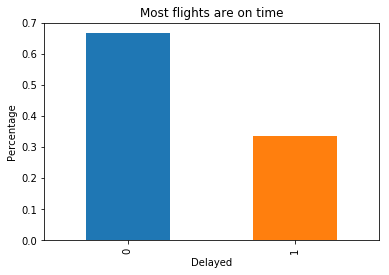

In [61]:
fig, ax = plt.subplots()
ax = brasil_dep2.Delayed.value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('Delayed')
ax.set_ylabel('Percentage')
plt.title('Most flights are on time')
plt.show()

### Use a Logistic Classifier to determine likelhood of flight being delayed
---

In [114]:
from sklearn.linear_model import LogisticRegression
# Define dataset
X = brasil_dep2.iloc[:,4:9]
y = brasil_dep2['Delayed']

In [63]:
X.head()

,DepartureMonth,DepartureDayOfWeek,DepartureHour,AirportCategory,AirlineCategory
1,1,6,0,68,31
2,1,6,0,79,15
3,1,6,0,51,1
4,1,6,0,83,31
5,1,6,1,120,31


In [64]:
# Hypertuning Parameters with 5 fold CV
from sklearn.model_selection import GridSearchCV

lr_gridsearch = GridSearchCV(LogisticRegression(), 
                             param_grid={'penalty' : ['l1','l2'],
                                        'C' : [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10]},
                            cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
lr_gridsearch.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [65]:
lr_gridsearch.best_params_

{'C': 1, 'penalty': 'l1'}

In [66]:
lr_gridsearch.best_score_

0.6717771417629155

In [67]:
# 5 fold cross validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 5, random_state=123)
model = LogisticRegression(C=2, penalty='l2')
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.6672611623072389


In [68]:
lr_gridsearch.predict_proba(X)[:,0].shape

(805725,)

In [69]:
lr_gridsearch.predict_proba(X)

array([[0.76416337, 0.23583663],
       [0.64740842, 0.35259158],
       [0.5561075 , 0.4438925 ],
       ...,
       [0.73095083, 0.26904917],
       [0.56666101, 0.43333899],
       [0.51974245, 0.48025755]])

In [115]:
clf = LogisticRegression(fit_intercept=True, C=2, penalty='l2')
clf.fit(X, y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
clf.intercept_, clf.coef_

(array([-0.28414661]),
 array([[ 0.02528531, -0.01514457,  0.01848796,  0.00305549, -0.03338448]]))

#### Note the largest coefficient is associated with the Airline category meaning, that which airline we travel on is a leading cause of how delayed the flight will be.

### Likelihood of being delayed

In [116]:
probability = clf.predict_proba(X)[:,1]
probability # Likelihood of missing the flight

array([0.23561462, 0.35226168, 0.4434225 , ..., 0.26863294, 0.43267379,
       0.47971112])

In [73]:
probability.shape

(805725,)

In [74]:
brasil_dep2.shape

(805725, 11)

In [117]:
X_lr = X.copy()
X_lr['ProbFlightDelay'] = pd.Series(probability, index=X_lr.index)
X_lr.head()

,DepartureMonth,DepartureDayOfWeek,DepartureHour,AirportCategory,AirlineCategory,ProbFlightDelay
1,1,6,0,68,31,0.235615
2,1,6,0,79,15,0.352262
3,1,6,0,51,1,0.443423
4,1,6,0,83,31,0.243969
5,1,6,1,120,31,0.269039


### Use a Decision Tree Classifier to determine likelhood of flight being delayed
---

In [105]:
from sklearn.tree import DecisionTreeClassifier
# Define dataset
X = brasil_dep2.iloc[:,4:9]
y = brasil_dep2['Delayed']

In [79]:
# Hypertuning Parameters with 5 fold CV
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5], 
                                  'criterion': ['gini', 'entropy'],
                                 # Lets go for 1, 2, 3 min samples left
                                 'min_samples_leaf': [1,2,3],
                                  # Dont bother splitting unless you have < x elements
                                  'min_samples_split': [2,3,4,5,6]}, verbose=1,
                                    cv=5, scoring='roc_auc')
grid.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  8.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [80]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [81]:
grid.best_score_

0.7245074707383836

In [83]:
# 5 Fold Cross with optimal parameters
kfold = KFold(n_splits=5, random_state=123)
cart = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1, min_samples_split=2)
dt_results = cross_val_score(cart, X, y, cv=kfold, scoring='roc_auc')
print(dt_results.mean())

0.725053147512494


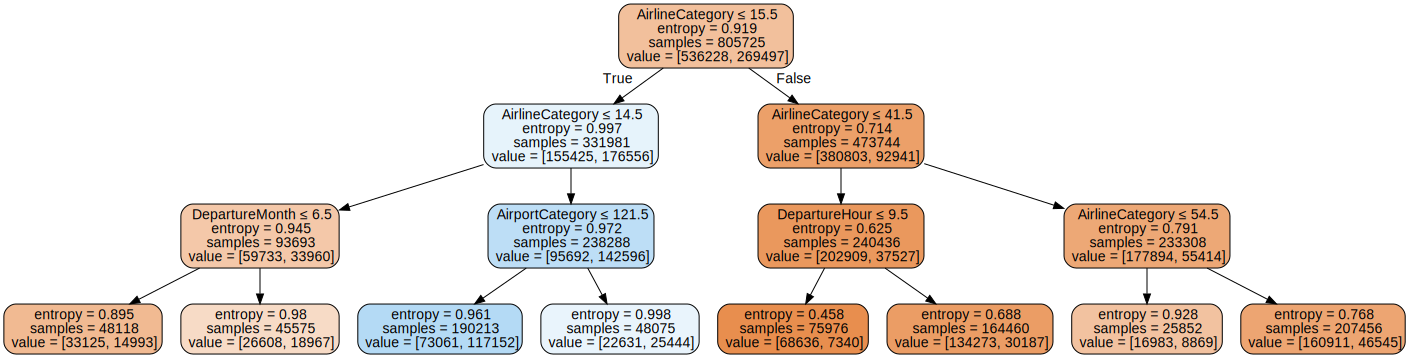

In [85]:
# Visualize this tree
X = brasil_dep2.iloc[:,4:9]
y = brasil_dep2['Delayed']
cart = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1, min_samples_split=2)
cart.fit(X,y)
delayed_data = sklearn.tree.export_graphviz(cart, out_file=None, 
                                        feature_names=X.columns,
                                       filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(delayed_data)
graph

#### Our Decision Tree reveals the cause of the delay really depends on the airline. The first two splits on the Decision Tree relate to the `Airline Category`, followed by the `Departure Month` and `Departure Hour`

In [118]:
cart = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1, min_samples_split=2)
cart.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [119]:
probability = cart.predict_proba(X)[:,1]
# Likelihood of missing the flight
probability

array([0.09660946, 0.61589902, 0.31158818, ..., 0.09660946, 0.31158818,
       0.31158818])

In [120]:
# Updating Probabliities of Flight Delays
X_dt = X.copy()
X_dt['ProbFlightDelay'] = pd.Series(probability, index=X_dt.index)
X_dt.head()

,DepartureMonth,DepartureDayOfWeek,DepartureHour,AirportCategory,AirlineCategory,ProbFlightDelay
1,1,6,0,68,31,0.096609
2,1,6,0,79,15,0.615899
3,1,6,0,51,1,0.311588
4,1,6,0,83,31,0.096609
5,1,6,1,120,31,0.096609


### Use a Random Forest Classifier to determine likelhood of flight being delayed
---

In [90]:
from sklearn.ensemble import RandomForestClassifier
# Define dataset
X = brasil_dep2.iloc[:,4:9]
y = brasil_dep2['Delayed']

In [95]:
# Hypertuning Parameters with 5 fold CV
forest_grid = GridSearchCV(RandomForestClassifier(), 
                      param_grid = {'max_depth': [1,2,3,4], 
                        'criterion': ['gini', 'entropy'],
                      'min_samples_leaf': [1,2,3],
                      'min_samples_split': [2,3,4,5]},
                        cv=5, verbose=1, scoring='roc_auc')
forest_grid.fit(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 23.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [98]:
forest_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [99]:
forest_grid.best_score_

0.729697843256315

In [100]:
# 5 Fold Cross with optimal parameters
kfold = KFold(n_splits=5, random_state=123)
cart = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=3)
rf_results = cross_val_score(cart, X, y, cv=kfold, scoring='roc_auc')
print(rf_results.mean())

0.7301944647964437


In [121]:
cart = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=3)
cart.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
probability = cart.predict_proba(X)[:,1]
# Likelihood of missing the flight
probability

array([0.17709648, 0.51252612, 0.42681024, ..., 0.16893045, 0.38938963,
       0.44972884])

In [123]:
# Updating Probabliities of Flight Delays
X_rf = X.copy()
X_rf['ProbFlightDelay'] = pd.Series(probability, index=X_rf.index)
X_rf.head()

,DepartureMonth,DepartureDayOfWeek,DepartureHour,AirportCategory,AirlineCategory,ProbFlightDelay
1,1,6,0,68,31,0.177096
2,1,6,0,79,15,0.512526
3,1,6,0,51,1,0.426810
4,1,6,0,83,31,0.177096
5,1,6,1,120,31,0.126535


### Using XGBoost Classifier to predict likelihood of Flight Delay
---

In [124]:
from xgboost.sklearn import XGBClassifier
# Define dataset
X = brasil_dep2.iloc[:,4:9]
y = brasil_dep2['Delayed']

In [125]:
# Hypertuning parameters for 5 fold cross validation split
param = {
 'n_estimators':[50,100,150], # 200,300,400],
 'max_depth':[2,3,4,5,6], # 7,8,9],
 'min_child_weight':[2,3,4,5],
 'colsample_bytree':[0.2,0.6,0.8],
 #'colsample_bylevel':[0.2,0.6,0.8]
}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid = param, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
xgb_grid.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 28.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100], 'max_depth': [2, 3, 4], 'min_child_weight': [2, 3, 4, 5], 'colsample_bytree': [0.2, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [126]:
xgb_grid.best_params_    

{'colsample_bytree': 0.8,
 'max_depth': 2,
 'min_child_weight': 2,
 'n_estimators': 50}

In [127]:
xgb_grid.best_score_

0.717907671101018

In [128]:
# 5 fold cross validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 5, random_state=123)
model = XGBClassifier(colsample_bytree=0.8, max_depth=2, min_child_weight=2, n_estimators=50)
results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
print(results.mean())

0.733135080616649


In [129]:
xgbc = XGBClassifier(colsample_bytree=0.8, max_depth=2, min_child_weight=2, n_estimators=50)
xgbc.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=2, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [130]:
probability = xgbc.predict_proba(X)[:,1]
# Likelihood of missing the flight
probability

array([0.15283334, 0.5693625 , 0.3421172 , ..., 0.13384373, 0.39185864,
       0.4022918 ], dtype=float32)

In [131]:
# Updating Probabliities of Flight Delays
X_xgb = X.copy()
X_xgb['ProbFlightDelay'] = pd.Series(probability, index=X_xgb.index)
X_xgb.head()

,DepartureMonth,DepartureDayOfWeek,DepartureHour,AirportCategory,AirlineCategory,ProbFlightDelay
1,1,6,0,68,31,0.152833
2,1,6,0,79,15,0.569363
3,1,6,0,51,1,0.342117
4,1,6,0,83,31,0.142561
5,1,6,1,120,31,0.151699


### Q5 a. Can you use your model/system to help me arrive at the airport within 30 minutes before departure? 
---
> **Essentially we want to take our dependent variables:**
    1. Departure airport
    2. Airline
    3. Month
    4. Dayofweek
    5. Departure Hour
  **and see if we can predict actual departure time - 30 minutes**

In [215]:
# First split up X and y into train and test sets
from sklearn.model_selection import train_test_split
X = brasil_dep2.iloc[:,4:9]
y = brasil_dep2.DepartureActual#.values.astype(np.int64)

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [216]:
from xgboost.sklearn import XGBRegressor
xgbr = XGBRegressor(colsample_bytree=0.8, max_depth=2, min_child_weight=2, n_estimators=50)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=2, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [217]:
y_pred = pd.Series(pd.to_datetime(xgbr.fit(X_train, y_train).predict(X_test)))

In [218]:
y_pred.head()

0   2017-05-11 18:11:38.339409920
1   2017-05-11 12:46:22.008016896
2   2017-05-11 12:46:22.008016896
3   2017-05-11 12:46:22.008016896
4   2017-05-11 12:46:22.008016896
dtype: datetime64[ns]

In [219]:
y_test.head()

691856   2017-10-27 07:03:00
691857   2017-10-27 06:26:00
691858   2017-10-27 07:45:00
691859   2017-10-27 07:00:00
691860   2017-10-27 06:00:00
Name: DepartureActual, dtype: datetime64[ns]

In [209]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.0

In [202]:
y_pred.head()

0   2017-03-01 05:57:47.625029632
1   2017-01-05 20:01:33.343612928
2   2017-04-23 21:39:06.086686720
3   2017-06-12 19:41:57.885591552
4   2017-01-05 20:01:33.343612928
dtype: datetime64[ns]

In [206]:
orig_y = y_test.reset_index(drop=True)
orig_y.head()

0   2017-05-07 19:10:00
1   2017-02-23 13:52:00
2   2017-08-06 15:40:00
3   2017-10-15 19:25:00
4   2017-02-05 20:26:00
Name: DepartureActual, dtype: datetime64[ns]

### Q5b. Can your system/model guarantee that 90% of the time I will not be waiting for longer than 1 hour or miss my flight?
---

### Q6. How to visit all airports from Porto Alegre, Brazil
---
### This is a variation of the Traveling Salesman Problem where we don't have to come back to the origin. So we write a program to calculate the Hamiltonian Path through all the airports.
---

### Assumption: Flights are available all the time, without the need to wait for connection
---

In [70]:
import networkx as nx

In [71]:
brasil_all_airports = brasil.copy()
# Look at all National and Regional flights
brasil_all_airports = brasil_all_airports.loc[(brasil_all_airports.RouteType == 'Nacional')|
                                             (brasil_all_airports.RouteType == 'Regional')]
# Exclude all cancelled flights
brasil_all_airports = brasil_all_airports.loc[brasil_all_airports.FlightStatus == 'REALIZADO']
# Drop Scheduled Departure/Arrival times
brasil_all_airports.drop(['ArrivalScheduled', 'DepartureScheduled', 'IDCode', 'DepartureState', 'DepartureCountry',
'StatusReason', 'DepartureState', 'DepartureContinent', 'ArrivalState', 'ArrivalCountry','ArrivalContinent',
'AirlineOrigin','StatusReasonDescription'], inplace=True, axis=1)
# Drop any routes from an airport to itself
brasil_all_airports = brasil_all_airports[brasil_all_airports.DepartureAirport != brasil_all_airports.ArrivalAirport]
brasil_all_airports.head()

,Airline,ArrivalActual,ArrivalAirport,DepartureActual,DepartureAirport,FlightNo,FlightStatus,RouteCode,DepartureAirportName,DepartureCity,ArrivalAirportName,ArrivalCity,AirlineName,FlightType,RouteType,FlightTime
1,GLO,2017-01-01 01:10:00,SBBE,2017-01-01 00:05:00,SBSL,1892,REALIZADO,N,MARECHAL CUNHA MACHADO,SÃO LUÍS,VAL DE CANS,BELÉM,GOL,Vôo Regular,Nacional,01:05:00
2,AZU,2017-01-01 02:12:00,SBKP,2017-01-01 00:48:00,SBBH,1,REALIZADO,N,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,BELO HORIZONTE,VIRACOPOS,CAMPINAS,AZUL,Vôo extra sem HOTRAN,Nacional,01:24:00
4,GLO,2017-01-01 02:35:00,SBBE,2017-01-01 00:45:00,SBFZ,1886,REALIZADO,N,PINTO MARTINS,FORTALEZA,VAL DE CANS,BELÉM,GOL,Vôo Regular,Nacional,01:50:00
5,GLO,2017-01-01 02:45:00,SBSN,2017-01-01 01:25:00,SBBE,1848,REALIZADO,N,VAL DE CANS,BELÉM,MAESTRO WILSON FONSECA,SANTARÉM,GOL,Vôo Regular,Nacional,01:20:00
6,GLO,2017-01-01 02:55:00,SBGR,2017-01-01 01:10:00,SBPS,9348,REALIZADO,N,PORTO SEGURO,PORTO SEGURO,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,GOL,Vôo charter,Nacional,01:45:00


In [72]:
brasil_all_airports.loc[brasil_all_airports.DepartureCity == 'PORTO ALEGRE']['DepartureAirportName'].value_counts()

SALGADO FILHO    27309
Name: DepartureAirportName, dtype: int64

There is one airport in Porto Alegre called 'Salgado Filho'.

In [73]:
# All routes in Brasil
brasil_all_airports['Route'] = brasil_all_airports.DepartureAirportName + '__' + brasil_all_airports.ArrivalAirportName
# Flight times are Arrival Time - Departure Time
brasil_all_airports['FlightTime'] = brasil_all_airports.ArrivalActual - brasil_all_airports.DepartureActual
brasil_all_airports.head()

,Airline,ArrivalActual,ArrivalAirport,DepartureActual,DepartureAirport,FlightNo,FlightStatus,RouteCode,DepartureAirportName,DepartureCity,ArrivalAirportName,ArrivalCity,AirlineName,FlightType,RouteType,FlightTime,Route
1,GLO,2017-01-01 01:10:00,SBBE,2017-01-01 00:05:00,SBSL,1892,REALIZADO,N,MARECHAL CUNHA MACHADO,SÃO LUÍS,VAL DE CANS,BELÉM,GOL,Vôo Regular,Nacional,01:05:00,MARECHAL CUNHA MACHADO__VAL DE CANS
2,AZU,2017-01-01 02:12:00,SBKP,2017-01-01 00:48:00,SBBH,1,REALIZADO,N,PAMPULHA - CARLOS DRUMMOND DE ANDRADE,BELO HORIZONTE,VIRACOPOS,CAMPINAS,AZUL,Vôo extra sem HOTRAN,Nacional,01:24:00,PAMPULHA - CARLOS DRUMMOND DE ANDRADE__VIRACOPOS
4,GLO,2017-01-01 02:35:00,SBBE,2017-01-01 00:45:00,SBFZ,1886,REALIZADO,N,PINTO MARTINS,FORTALEZA,VAL DE CANS,BELÉM,GOL,Vôo Regular,Nacional,01:50:00,PINTO MARTINS__VAL DE CANS
5,GLO,2017-01-01 02:45:00,SBSN,2017-01-01 01:25:00,SBBE,1848,REALIZADO,N,VAL DE CANS,BELÉM,MAESTRO WILSON FONSECA,SANTARÉM,GOL,Vôo Regular,Nacional,01:20:00,VAL DE CANS__MAESTRO WILSON FONSECA
6,GLO,2017-01-01 02:55:00,SBGR,2017-01-01 01:10:00,SBPS,9348,REALIZADO,N,PORTO SEGURO,PORTO SEGURO,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,GOL,Vôo charter,Nacional,01:45:00,PORTO SEGURO__GUARULHOS - GOVERNADOR ANDRÉ FRA...


In [74]:
brasil_all_airports.FlightTime.describe()

count                    683223
mean     0 days 01:43:25.845148
std      0 days 00:45:49.941113
min             0 days 00:11:00
25%             0 days 01:09:00
50%             0 days 01:30:00
75%             0 days 02:07:00
max             1 days 02:18:00
Name: FlightTime, dtype: object

In [76]:
# Now let's get average flight times for these routes
brasil_all_airports['FlightTimeNew'] = brasil_all_airports.FlightTime.values.astype(np.int64)
means = brasil_all_airports.groupby('Route')['FlightTimeNew'].mean()
means = pd.to_timedelta(means)
#means['FlightTimeNew'] = pd.to_timedelta(means['FlightTimeNew'])
means.head()

Route
ADALBERTO MENDES DA SILVA__AFONSO PENA                                   01:17:05.801324
ADALBERTO MENDES DA SILVA__GOVERNADOR JOSÉ RICHA                                01:12:30
ADALBERTO MENDES DA SILVA__GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO   02:15:02.571428
ADALBERTO MENDES DA SILVA__LAURO CARNEIRO DE LOYOLA                             01:46:00
ADALBERTO MENDES DA SILVA__PAMPULHA - CARLOS DRUMMOND DE ANDRADE                03:07:20
Name: FlightTimeNew, dtype: timedelta64[ns]

In [77]:
# Check the numbers make sense
brasil_all_airports[brasil_all_airports.Route == 'ADALBERTO MENDES DA SILVA__AFONSO PENA']

,Airline,ArrivalActual,ArrivalAirport,DepartureActual,DepartureAirport,FlightNo,FlightStatus,RouteCode,DepartureAirportName,DepartureCity,ArrivalAirportName,ArrivalCity,AirlineName,FlightType,RouteType,FlightTime,Route,FlightTimeNew
505,AZU,2017-01-01 12:29:00,SBCT,2017-01-01 11:06:00,SBCA,5713,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:23:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,4980000000000
2654,AZU,2017-01-02 08:10:00,SBCT,2017-01-02 06:50:00,SBCA,5711,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:20:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,4800000000000
5550,AZU,2017-01-03 08:10:00,SBCT,2017-01-03 06:50:00,SBCA,5711,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:20:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,4800000000000
8279,AZU,2017-01-04 07:59:00,SBCT,2017-01-04 06:45:00,SBCA,5711,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:14:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,4440000000000
11101,AZU,2017-01-05 08:11:00,SBCT,2017-01-05 06:47:00,SBCA,5711,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:24:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,5040000000000
13913,AZU,2017-01-06 08:06:00,SBCT,2017-01-06 06:51:00,SBCA,5711,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:15:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,4500000000000
19714,AZU,2017-01-08 12:31:00,SBCT,2017-01-08 11:04:00,SBCA,5713,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:27:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,5220000000000
21898,AZU,2017-01-09 08:05:00,SBCT,2017-01-09 06:47:00,SBCA,5711,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:18:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,4680000000000
24840,AZU,2017-01-10 08:10:00,SBCT,2017-01-10 07:00:00,SBCA,5711,REALIZADO,R,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Regional,01:10:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,4200000000000
27641,AZU,2017-01-11 08:04:00,SBCT,2017-01-11 06:53:00,SBCA,5711,REALIZADO,N,ADALBERTO MENDES DA SILVA,CASCAVEL,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,AZUL,Vôo Regular,Nacional,01:11:00,ADALBERTO MENDES DA SILVA__AFONSO PENA,4260000000000


In [83]:
flighttimes = pd.DataFrame(means).reset_index()
flighttimes.columns = ['Route', 'AverageFlightTime']
flighttimes.head()

,Route,AverageFlightTime
0,ADALBERTO MENDES DA SILVA__AFONSO PENA,01:17:05.801324
1,ADALBERTO MENDES DA SILVA__GOVERNADOR JOSÉ RICHA,01:12:30
2,ADALBERTO MENDES DA SILVA__GUARULHOS - GOVERNA...,02:15:02.571428
3,ADALBERTO MENDES DA SILVA__LAURO CARNEIRO DE L...,01:46:00
4,ADALBERTO MENDES DA SILVA__PAMPULHA - CARLOS D...,03:07:20


In [85]:
brasil_nodes = brasil_all_airports.merge(flighttimes)
brasil_nodes.head()

,Airline,ArrivalActual,ArrivalAirport,DepartureActual,DepartureAirport,FlightNo,FlightStatus,RouteCode,DepartureAirportName,DepartureCity,ArrivalAirportName,ArrivalCity,AirlineName,FlightType,RouteType,FlightTime,Route,FlightTimeNew,AverageFlightTime
0,GLO,2017-01-01 01:10:00,SBBE,2017-01-01 00:05:00,SBSL,1892,REALIZADO,N,MARECHAL CUNHA MACHADO,SÃO LUÍS,VAL DE CANS,BELÉM,GOL,Vôo Regular,Nacional,01:05:00,MARECHAL CUNHA MACHADO__VAL DE CANS,3900000000000,01:07:07.364185
1,AZU,2017-01-01 12:29:00,SBBE,2017-01-01 11:30:00,SBSL,4495,REALIZADO,N,MARECHAL CUNHA MACHADO,SÃO LUÍS,VAL DE CANS,BELÉM,AZUL,Vôo Regular,Nacional,00:59:00,MARECHAL CUNHA MACHADO__VAL DE CANS,3540000000000,01:07:07.364185
2,GLO,2017-01-01 20:48:00,SBBE,2017-01-01 19:40:00,SBSL,1894,REALIZADO,R,MARECHAL CUNHA MACHADO,SÃO LUÍS,VAL DE CANS,BELÉM,GOL,Vôo Regular,Regional,01:08:00,MARECHAL CUNHA MACHADO__VAL DE CANS,4080000000000,01:07:07.364185
3,AZU,2017-01-01 22:16:00,SBBE,2017-01-01 21:11:00,SBSL,4371,REALIZADO,N,MARECHAL CUNHA MACHADO,SÃO LUÍS,VAL DE CANS,BELÉM,AZUL,Vôo Regular,Nacional,01:05:00,MARECHAL CUNHA MACHADO__VAL DE CANS,3900000000000,01:07:07.364185
4,GLO,2017-01-02 01:10:00,SBBE,2017-01-02 00:05:00,SBSL,1892,REALIZADO,N,MARECHAL CUNHA MACHADO,SÃO LUÍS,VAL DE CANS,BELÉM,GOL,Vôo Regular,Nacional,01:05:00,MARECHAL CUNHA MACHADO__VAL DE CANS,3900000000000,01:07:07.364185


In [92]:
brasil_nodes2 = brasil_nodes.copy()
brasil_nodes2 = brasil_nodes2[['DepartureCity', 'ArrivalCity', 'Route', 'AverageFlightTime']].drop_duplicates()
brasil_nodes2.reset_index(drop=True).head()

,DepartureCity,ArrivalCity,Route,AverageFlightTime
0,SÃO LUÍS,BELÉM,MARECHAL CUNHA MACHADO__VAL DE CANS,01:07:07.364185
1,BELO HORIZONTE,CAMPINAS,PAMPULHA - CARLOS DRUMMOND DE ANDRADE__VIRACOPOS,01:31:32.173913
2,FORTALEZA,BELÉM,PINTO MARTINS__VAL DE CANS,01:52:21.830065
3,BELÉM,SANTARÉM,VAL DE CANS__MAESTRO WILSON FONSECA,01:22:00.351170
4,PORTO SEGURO,GUARULHOS,PORTO SEGURO__GUARULHOS - GOVERNADOR ANDRÉ FRA...,02:03:49.536903


In [95]:
FG=nx.from_pandas_edgelist(brasil_nodes2, source='DepartureCity', target='ArrivalCity', edge_attr=True)

In [150]:
len(FG)

125

In [97]:
FG.edges()

EdgeView([('SÃO LUÍS', 'BELÉM'), ('SÃO LUÍS', 'FORTALEZA'), ('SÃO LUÍS', 'TERESINA'), ('SÃO LUÍS', 'BRASÍLIA'), ('SÃO LUÍS', 'IMPERATRIZ'), ('SÃO LUÍS', 'GUARULHOS'), ('SÃO LUÍS', 'RECIFE'), ('SÃO LUÍS', 'SÃO PAULO'), ('SÃO LUÍS', 'RIO DE JANEIRO'), ('SÃO LUÍS', 'CONFINS'), ('SÃO LUÍS', 'CAMPINAS'), ('SÃO LUÍS', 'ALTAMIRA'), ('SÃO LUÍS', 'JI-PARANÁ'), ('SÃO LUÍS', 'BELO HORIZONTE'), ('SÃO LUÍS', 'UBERLÂNDIA'), ('SÃO LUÍS', 'MACAPÁ'), ('SÃO LUÍS', 'MARABÁ'), ('SÃO LUÍS', 'MANAUS'), ('SÃO LUÍS', 'PARNAÍBA'), ('SÃO LUÍS', 'SÃO GONÇALO DO AMARANTE'), ('SÃO LUÍS', 'MONTES CLAROS'), ('BELÉM', 'FORTALEZA'), ('BELÉM', 'SANTARÉM'), ('BELÉM', 'MANAUS'), ('BELÉM', 'CONFINS'), ('BELÉM', 'ALTAMIRA'), ('BELÉM', 'GUARULHOS'), ('BELÉM', 'MACAPÁ'), ('BELÉM', 'BRASÍLIA'), ('BELÉM', 'RIO DE JANEIRO'), ('BELÉM', 'RECIFE'), ('BELÉM', 'SÃO PAULO'), ('BELÉM', 'MARABÁ'), ('BELÉM', 'CAMPINAS'), ('BELÉM', 'PARAUAPEBAS'), ('BELÉM', 'BELO HORIZONTE'), ('BELÉM', 'SÃO GONÇALO DO AMARANTE'), ('BELÉM', 'IMPERATRIZ'),

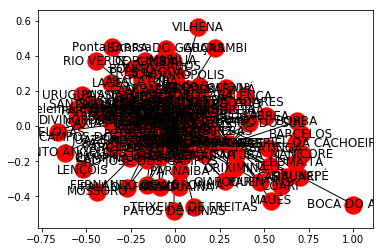

In [98]:
nx.draw_networkx(FG, with_labels=True)

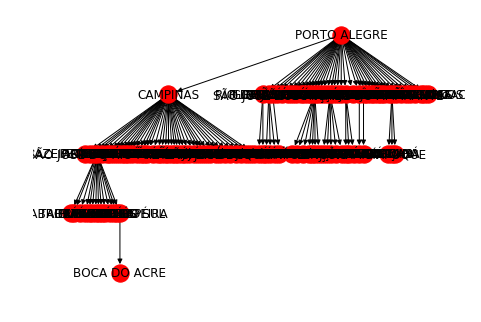

In [146]:
tree = nx.bfs_tree(FG, "PORTO ALEGRE")
positions = nx.drawing.nx_agraph.graphviz_layout(tree, prog="dot")
nx.draw(tree, positions, with_labels=True)

In [148]:
# Look at all the shortest paths from Porto Alegre
print(nx.shortest_path_length(FG, "PORTO ALEGRE"))

{'PORTO ALEGRE': 0, 'CAMPINAS': 1, 'RIO DE JANEIRO': 1, 'GUARULHOS': 1, 'BRASÍLIA': 1, 'FLORIANÓPOLIS': 1, 'SÃO JOSÉ DOS PINHAIS': 1, 'SÃO PAULO': 1, 'FOZ DO IGUAÇU': 1, 'NAVEGANTES': 1, 'SANTA MARIA': 1, 'VITÓRIA': 1, 'RIO LARGO': 1, 'CHAPECÓ': 1, 'CONFINS': 1, 'PELOTAS': 1, 'URUGUAIANA': 1, 'PASSO FUNDO': 1, 'SALVADOR': 1, 'RECIFE': 1, 'PORTO SEGURO': 1, 'FORTALEZA': 1, 'VÁRZEA GRANDE': 1, 'SÃO GONÇALO DO AMARANTE': 1, 'BELO HORIZONTE': 1, 'GOIÂNIA': 1, 'CASCAVEL': 1, 'LONDRINA': 1, 'JAGUARUNA': 1, 'MARINGÁ': 1, 'UNA': 1, 'RIBEIRÃO PRETO': 1, 'JOINVILLE': 1, 'BELÉM': 1, 'CAMPO GRANDE': 1, 'SANTO ÂNGELO': 1, 'CALDAS NOVAS': 1, 'AREALVA': 1, 'CAMPOS DOS GOYTACAZES': 1, 'VARGINHA': 1, 'SÃO CARLOS': 1, 'Sorriso': 1, 'JUAZEIRO DO NORTE': 2, 'ARACAJU': 2, 'PETROLINA': 2, 'MANAUS': 2, 'SÃO JOSÉ DO RIO PRETO': 2, 'BAYEUX': 2, 'TERESINA': 2, 'ARAÇATUBA': 2, 'DIVINÓPOLIS': 2, 'UBERABA': 2, 'BONITO': 2, 'CORUMBÁ': 2, 'UBERLÂNDIA': 2, 'CAXIAS DO SUL': 2, 'ILHÉUS': 2, 'RIO VERDE': 2, 'DOURADOS': 

In [99]:
nx.single_source_shortest_path(FG, source='PORTO ALEGRE')

{'ALTA FLORESTA': ['PORTO ALEGRE', 'CAMPINAS', 'ALTA FLORESTA'],
 'ALTAMIRA': ['PORTO ALEGRE', 'CAMPINAS', 'ALTAMIRA'],
 'ARACAJU': ['PORTO ALEGRE', 'CAMPINAS', 'ARACAJU'],
 'ARAGUAÍNA': ['PORTO ALEGRE', 'GOIÂNIA', 'ARAGUAÍNA'],
 'ARAXÁ': ['PORTO ALEGRE', 'CONFINS', 'ARAXÁ'],
 'ARAÇATUBA': ['PORTO ALEGRE', 'CAMPINAS', 'ARAÇATUBA'],
 'AREALVA': ['PORTO ALEGRE', 'AREALVA'],
 'BARCELOS': ['PORTO ALEGRE', 'CAMPINAS', 'MANAUS', 'BARCELOS'],
 'BARRA DO GARÇAS': ['PORTO ALEGRE', 'VÁRZEA GRANDE', 'BARRA DO GARÇAS'],
 'BARREIRAS': ['PORTO ALEGRE', 'BRASÍLIA', 'BARREIRAS'],
 'BAYEUX': ['PORTO ALEGRE', 'CAMPINAS', 'BAYEUX'],
 'BELO HORIZONTE': ['PORTO ALEGRE', 'BELO HORIZONTE'],
 'BELÉM': ['PORTO ALEGRE', 'BELÉM'],
 'BOA VISTA': ['PORTO ALEGRE', 'CAMPINAS', 'BOA VISTA'],
 'BOCA DO ACRE': ['PORTO ALEGRE',
  'CAMPINAS',
  'MANAUS',
  'EIRUNEPÉ',
  'BOCA DO ACRE'],
 'BONITO': ['PORTO ALEGRE', 'CAMPINAS', 'BONITO'],
 'BORBA': ['PORTO ALEGRE', 'CAMPINAS', 'MANAUS', 'BORBA'],
 'BRASÍLIA': ['PORTO ALEGR

In [101]:
nx.single_source_dijkstra_path(FG, source='PORTO ALEGRE')

{'ALTA FLORESTA': ['PORTO ALEGRE', 'CAMPINAS', 'ALTA FLORESTA'],
 'ALTAMIRA': ['PORTO ALEGRE', 'CAMPINAS', 'ALTAMIRA'],
 'ARACAJU': ['PORTO ALEGRE', 'CAMPINAS', 'ARACAJU'],
 'ARAGUAÍNA': ['PORTO ALEGRE', 'GOIÂNIA', 'ARAGUAÍNA'],
 'ARAXÁ': ['PORTO ALEGRE', 'CONFINS', 'ARAXÁ'],
 'ARAÇATUBA': ['PORTO ALEGRE', 'CAMPINAS', 'ARAÇATUBA'],
 'AREALVA': ['PORTO ALEGRE', 'AREALVA'],
 'BARCELOS': ['PORTO ALEGRE', 'CAMPINAS', 'MANAUS', 'BARCELOS'],
 'BARRA DO GARÇAS': ['PORTO ALEGRE', 'VÁRZEA GRANDE', 'BARRA DO GARÇAS'],
 'BARREIRAS': ['PORTO ALEGRE', 'BRASÍLIA', 'BARREIRAS'],
 'BAYEUX': ['PORTO ALEGRE', 'CAMPINAS', 'BAYEUX'],
 'BELO HORIZONTE': ['PORTO ALEGRE', 'BELO HORIZONTE'],
 'BELÉM': ['PORTO ALEGRE', 'BELÉM'],
 'BOA VISTA': ['PORTO ALEGRE', 'CAMPINAS', 'BOA VISTA'],
 'BOCA DO ACRE': ['PORTO ALEGRE',
  'CAMPINAS',
  'MANAUS',
  'EIRUNEPÉ',
  'BOCA DO ACRE'],
 'BONITO': ['PORTO ALEGRE', 'CAMPINAS', 'BONITO'],
 'BORBA': ['PORTO ALEGRE', 'CAMPINAS', 'MANAUS', 'BORBA'],
 'BRASÍLIA': ['PORTO ALEGR

In [105]:
nx.average_shortest_path_length(FG)

2.2465806451612904

In [152]:
distances=[]
#go through each type of cycle we can have (1-7)
for i in range(1,len(FG)+1): #1-8 because range is not inclusive
    #cutoff is to make sure we get the Hamiltonian. cycle
    for path in nx.all_simple_paths(FG, source=i, target=i, cutoff=len(FG)):
        #we only want the longest ones
        if(len(path)==len(FG)+1):
            distance=0
            #add up the weights for each edge
            for i in range(0,len(FG)):
                distance=distance+FG[path[i]][path[i+1]]['weight']
            #add these to a list
            distances.append((distance,path))

NodeNotFound: source node 1 not in graph

### Q7: Bonus
---
I would employ one of two approaches here: 

1. Apply a Chow test to look at whether there was a structural break around the date of the accident itself and what impact it had on flights in Brazail, the airline and Sao Paulo, perhaps by taking a two year history pre and post the date of the accident.

2. Use time-series forecasting models such as SARIMA (or maybe LSTMs) to evaluate whether there was any impact around the date of the accident itself.